# Task 1: Data Analysis for earnings.csv


In [1]:
import pandas as pd

df = pd.read_csv('earnings.csv', sep=';')

print("Basic information about the dataframe:")
print(f"Number of observations (rows): {len(df)}")


Basic information about the dataframe:
Number of observations (rows): 11000


In [2]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage.round(2)
})

total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("The dataset has no missing values.")
else:
    print(f"The dataset has {total_missing} missing values across all columns.")


The dataset has no missing values.


There are 11 000 observations in the dataset and no missing values. The dataset contains a total of 14 variables (one additional column contains an ID number). Of these variables:
* Five are qualitative (rows 6–10): sector, section_07, sex, education, contract
* Nine are quantitative (rows 2–5 and 11–15): base, bonus, overtime_pay, other, age, duration_total, duration_entity, duration_nominal, duration_overtime


In [3]:
print("\n--- Descriptive Statistics for Qualitative Variables ---\n")

qualitative_vars = ['sector', 'section_07', 'sex', 'education', 'contract']

sex_dict = {
    1: 'man',
    2: 'woman'
}

sector_dict = {
    1: 'public',
    2: 'private'
}

section_07_dict = {
    1: 'Public Administration and Defence; Compulsory Social Security',
    2: 'Education',
    3: 'Human Health and Social Work Activities'
}

contract_dict = {
    1: 'for an indefinite period',
    2: 'for a definite period'
}

education_dict = {
    1: 'doctorate',
    2: 'higher',
    3: 'post-secondary',
    4: 'secondary',
    5: 'basic vocational',
    6: 'middle school and below'
}

for var in qualitative_vars:
    print(f"\nFrequency table for {var}:")
    freq_table = df[var].value_counts().reset_index()
    freq_table.columns = [var, 'Count']
    freq_table['Percentage'] = (freq_table['Count'] / len(df) * 100).round(2)

    if var == 'sex':
        freq_table['Label'] = freq_table['sex'].map(sex_dict)
    elif var == 'sector':
        freq_table['Label'] = freq_table['sector'].map(sector_dict)
    elif var == 'section_07':
        freq_table['Label'] = freq_table['section_07'].map(section_07_dict)
    elif var == 'education':
        freq_table['Label'] = freq_table['education'].map(education_dict)
    elif var == 'contract':
        freq_table['Label'] = freq_table['contract'].map(contract_dict)

    print(freq_table)



--- Descriptive Statistics for Qualitative Variables ---


Frequency table for sector:
   sector  Count  Percentage    Label
0       1  10548       95.89   public
1       2    452        4.11  private

Frequency table for section_07:
   section_07  Count  Percentage  \
0           2   5867       53.34   
1           3   2732       24.84   
2           1   2401       21.83   

                                               Label  
0                                          Education  
1            Human Health and Social Work Activities  
2  Public Administration and Defence; Compulsory ...  

Frequency table for sex:
   sex  Count  Percentage  Label
0    2   8289       75.35  woman
1    1   2711       24.65    man

Frequency table for education:
   education  Count  Percentage                    Label
0          2   6633       60.30                   higher
1          4   1983       18.03                secondary
2          5    906        8.24         basic vocational
3          3   

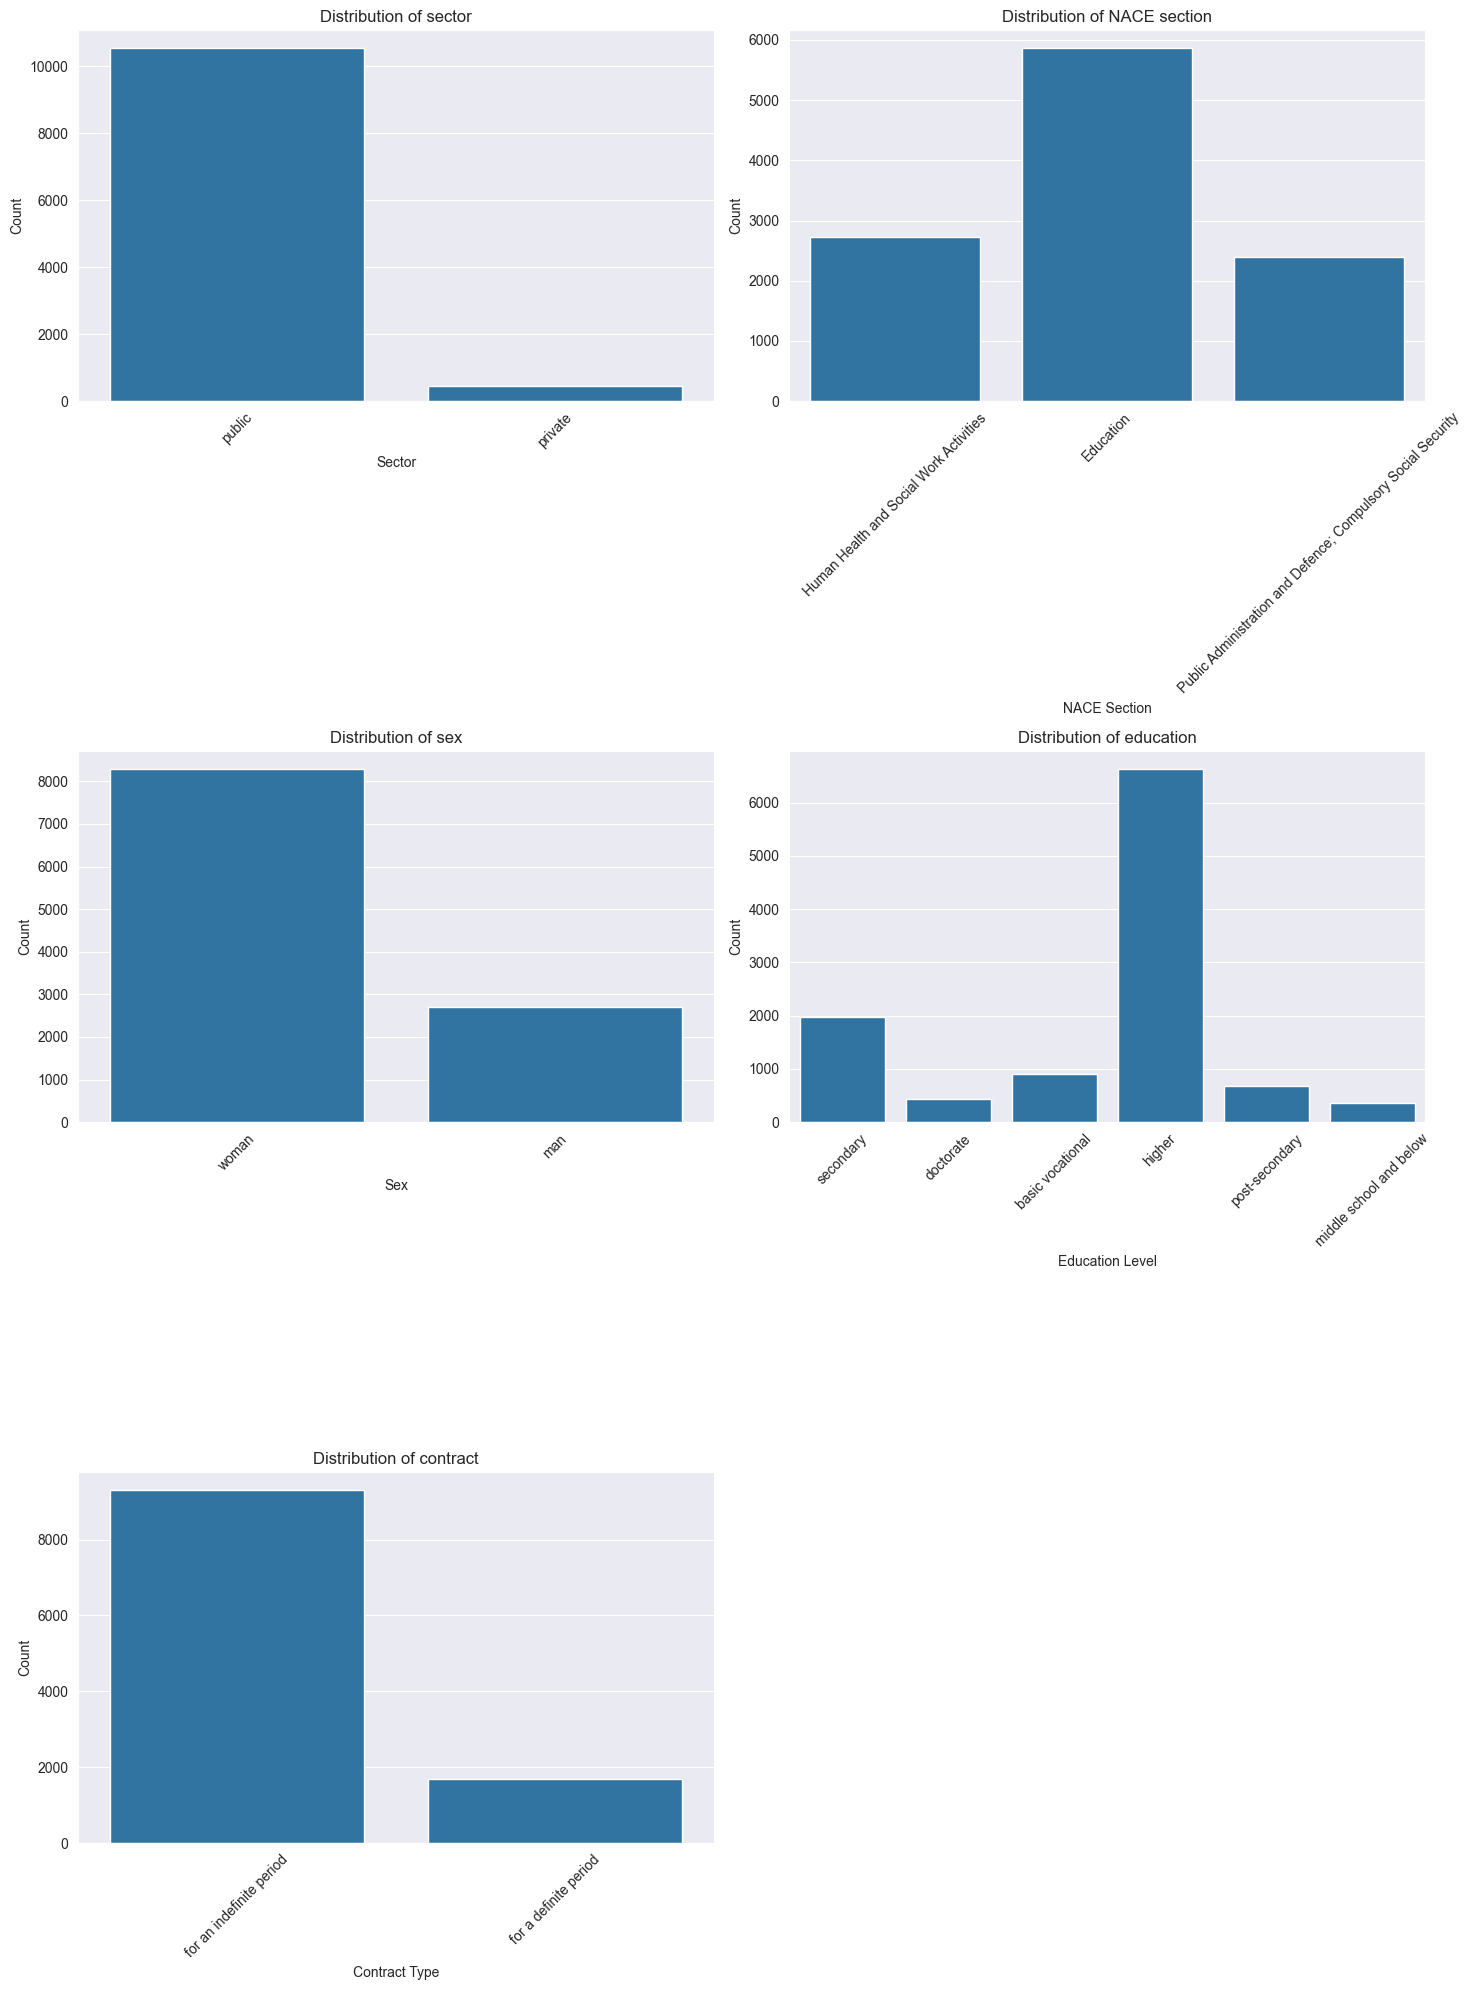

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, var in enumerate(qualitative_vars):
    plt.subplot(3, 2, i+1)

    df_plot = df.copy()

    if var == 'sex':
        df_plot['sex_label'] = df_plot['sex'].map(sex_dict)
        sns.countplot(x='sex_label', data=df_plot)
        plt.title(f'Distribution of sex')
        plt.xlabel('Sex')
    elif var == 'sector':
        df_plot['sector_label'] = df_plot['sector'].map(sector_dict)
        sns.countplot(x='sector_label', data=df_plot)
        plt.title(f'Distribution of sector')
        plt.xlabel('Sector')
    elif var == 'section_07':
        df_plot['section_07_label'] = df_plot['section_07'].map(section_07_dict)
        sns.countplot(x='section_07_label', data=df_plot)
        plt.title(f'Distribution of NACE section')
        plt.xlabel('NACE Section')
    elif var == 'education':
        df_plot['education_label'] = df_plot['education'].map(education_dict)
        sns.countplot(x='education_label', data=df_plot)
        plt.title(f'Distribution of education')
        plt.xlabel('Education Level')
    elif var == 'contract':
        df_plot['contract_label'] = df_plot['contract'].map(contract_dict)
        sns.countplot(x='contract_label', data=df_plot)
        plt.title(f'Distribution of contract')
        plt.xlabel('Contract Type')

    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [5]:
print("\n--- Descriptive Statistics for Quantitative Variables ---\n")

quantitative_vars = ['base', 'bonus', 'overtime_pay', 'other', 
                     'age', 'duration_total', 'duration_entity', 
                     'duration_nominal', 'duration_overtime']

quant_stats = df[quantitative_vars].describe().T
quant_stats['variance'] = df[quantitative_vars].var()
quant_stats = quant_stats.round(2)
print(quant_stats)



--- Descriptive Statistics for Quantitative Variables ---

                     count      mean       std    min       25%       50%  \
base               11000.0  33376.74  19276.55  10.00  20995.12  31341.25   
bonus              11000.0   2128.49   4966.44   0.00      0.00    620.00   
overtime_pay       11000.0   1679.27   5407.96   0.00      0.00      0.00   
other              11000.0   2477.63   3715.42   0.00      0.00   2141.82   
age                11000.0     42.47     10.01  19.00     34.00     43.00   
duration_total     11000.0     18.57     11.00   0.01      9.03     19.04   
duration_entity    11000.0     11.40      9.32   0.01      3.07      9.10   
duration_nominal   11000.0   1301.31    540.19  12.80    766.80   1591.90   
duration_overtime  11000.0     47.70    111.96   0.00      0.00      0.00   

                        75%        max      variance  
base               41348.29  241624.39  3.715854e+08  
bonus               2940.72  258061.00  2.466557e+07  
over

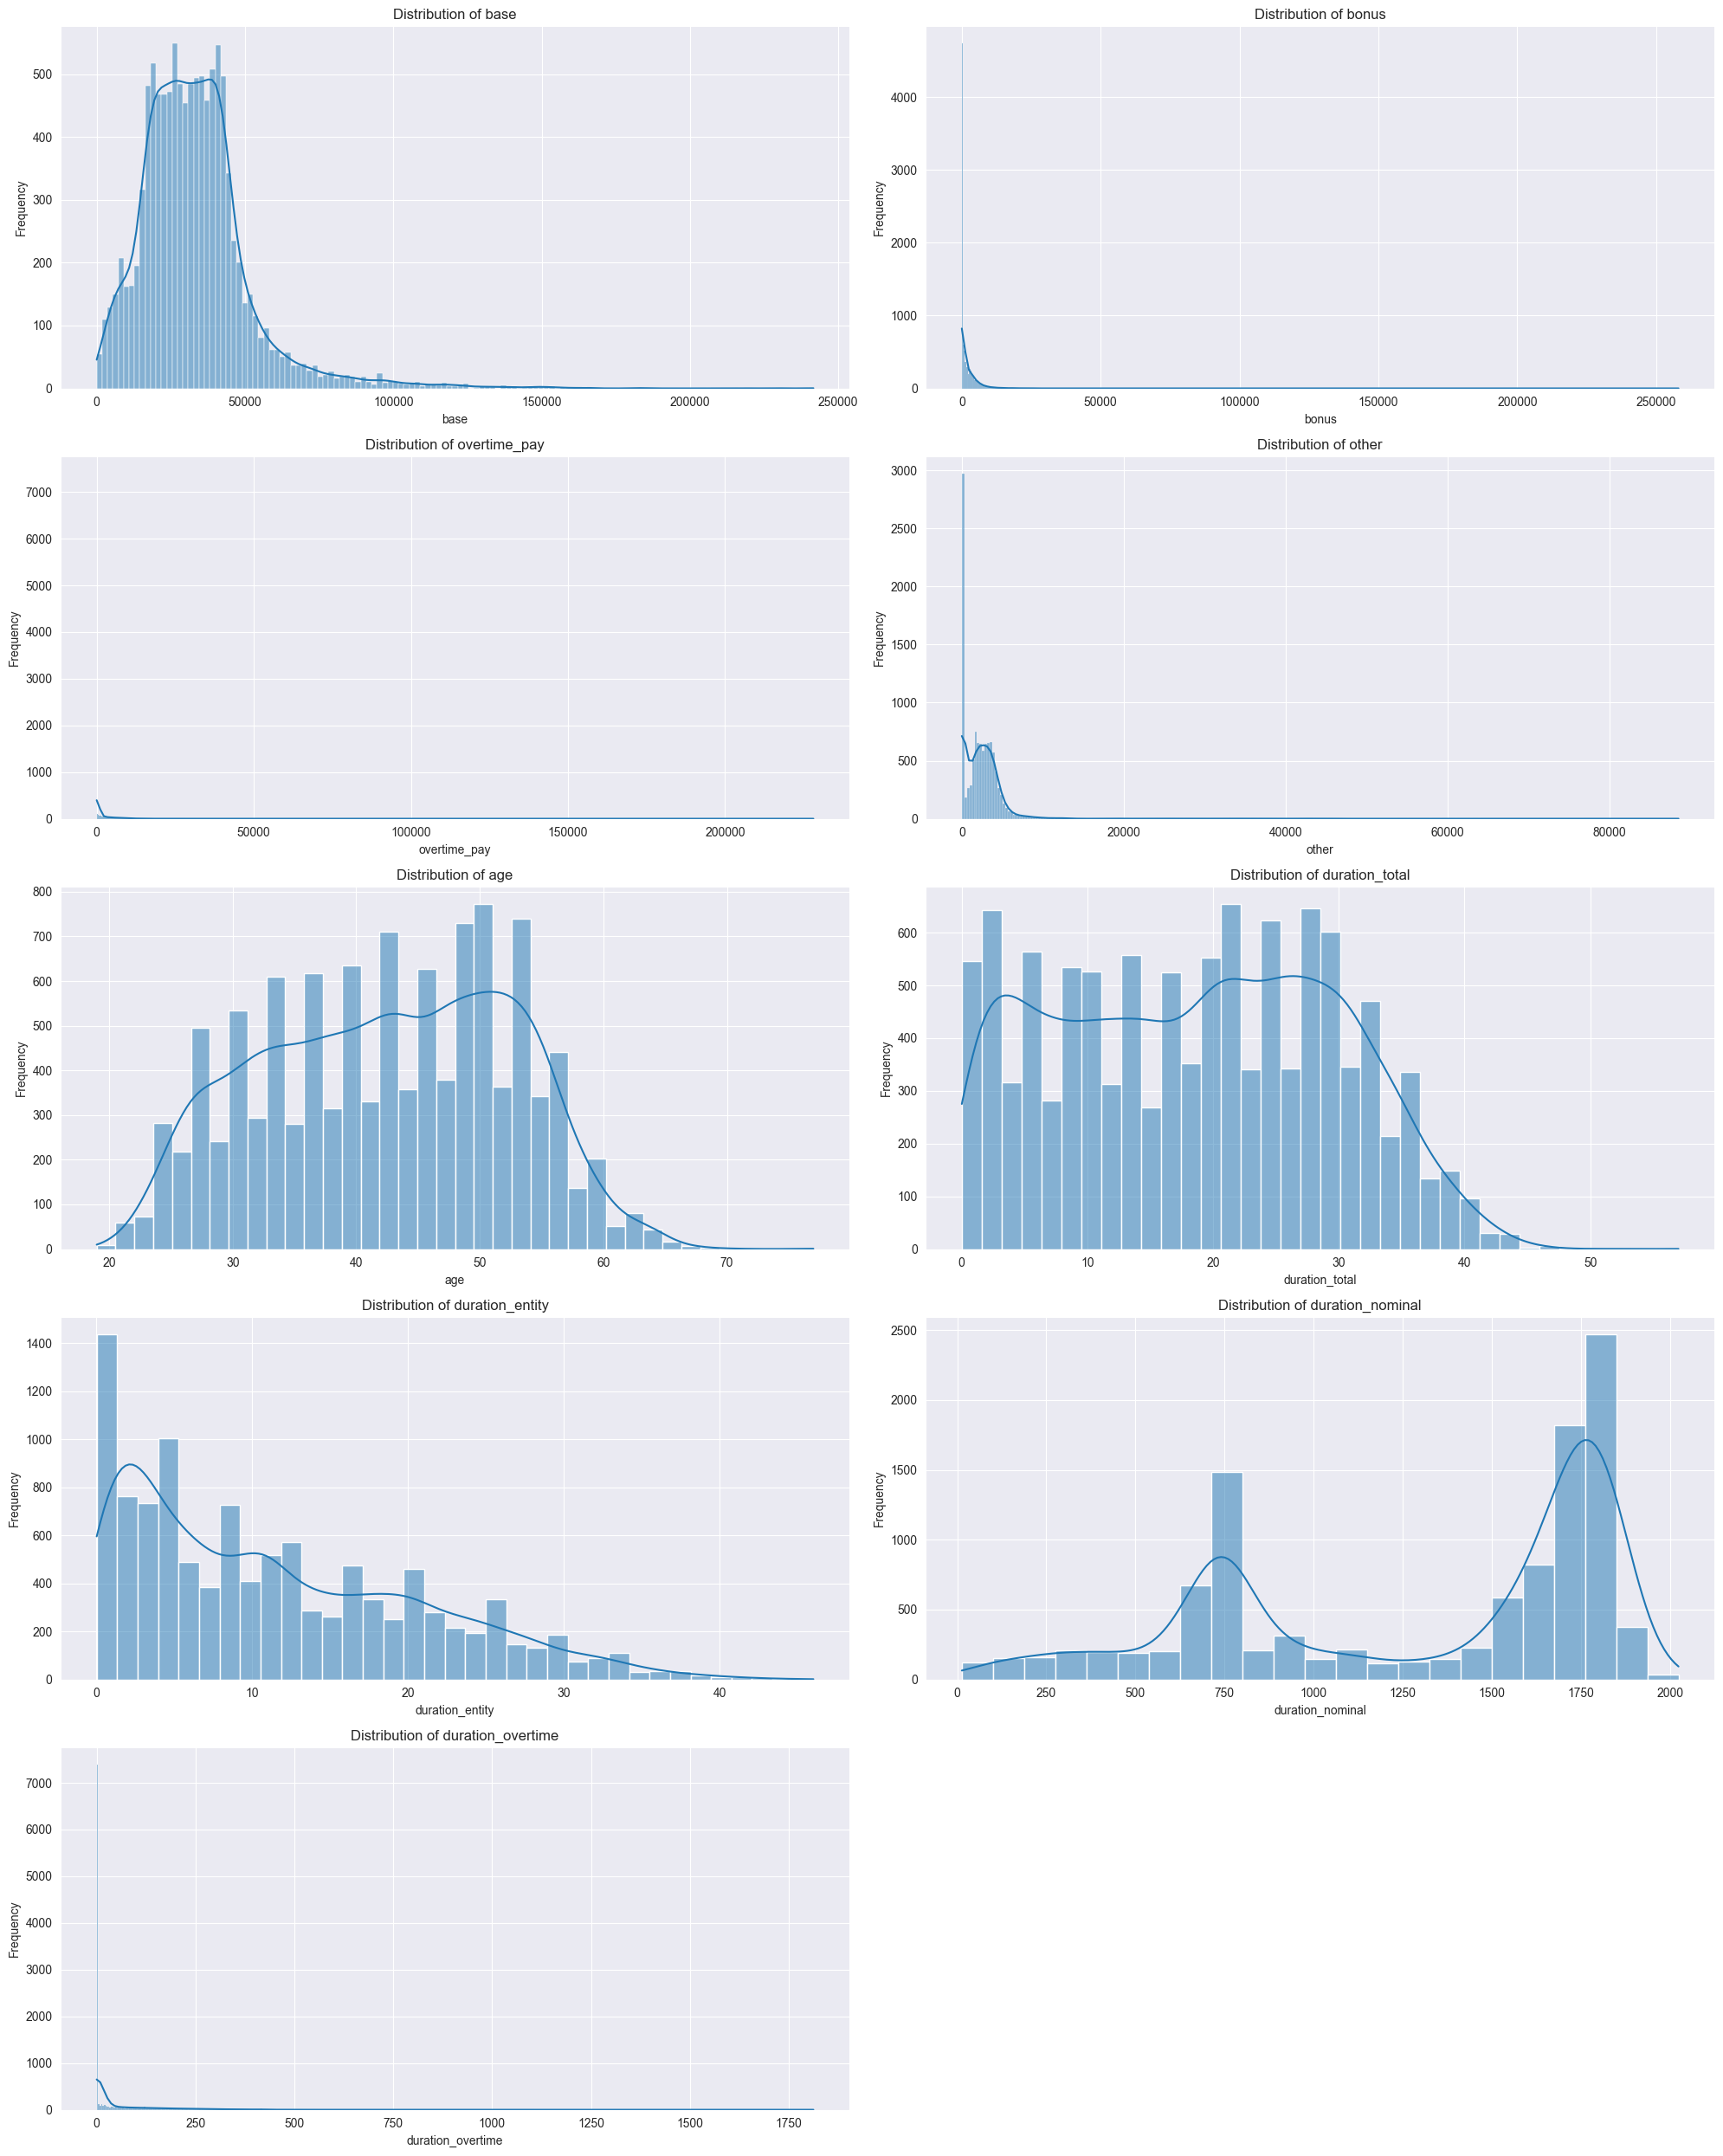

In [6]:
plt.figure(figsize=(20, 25))
for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


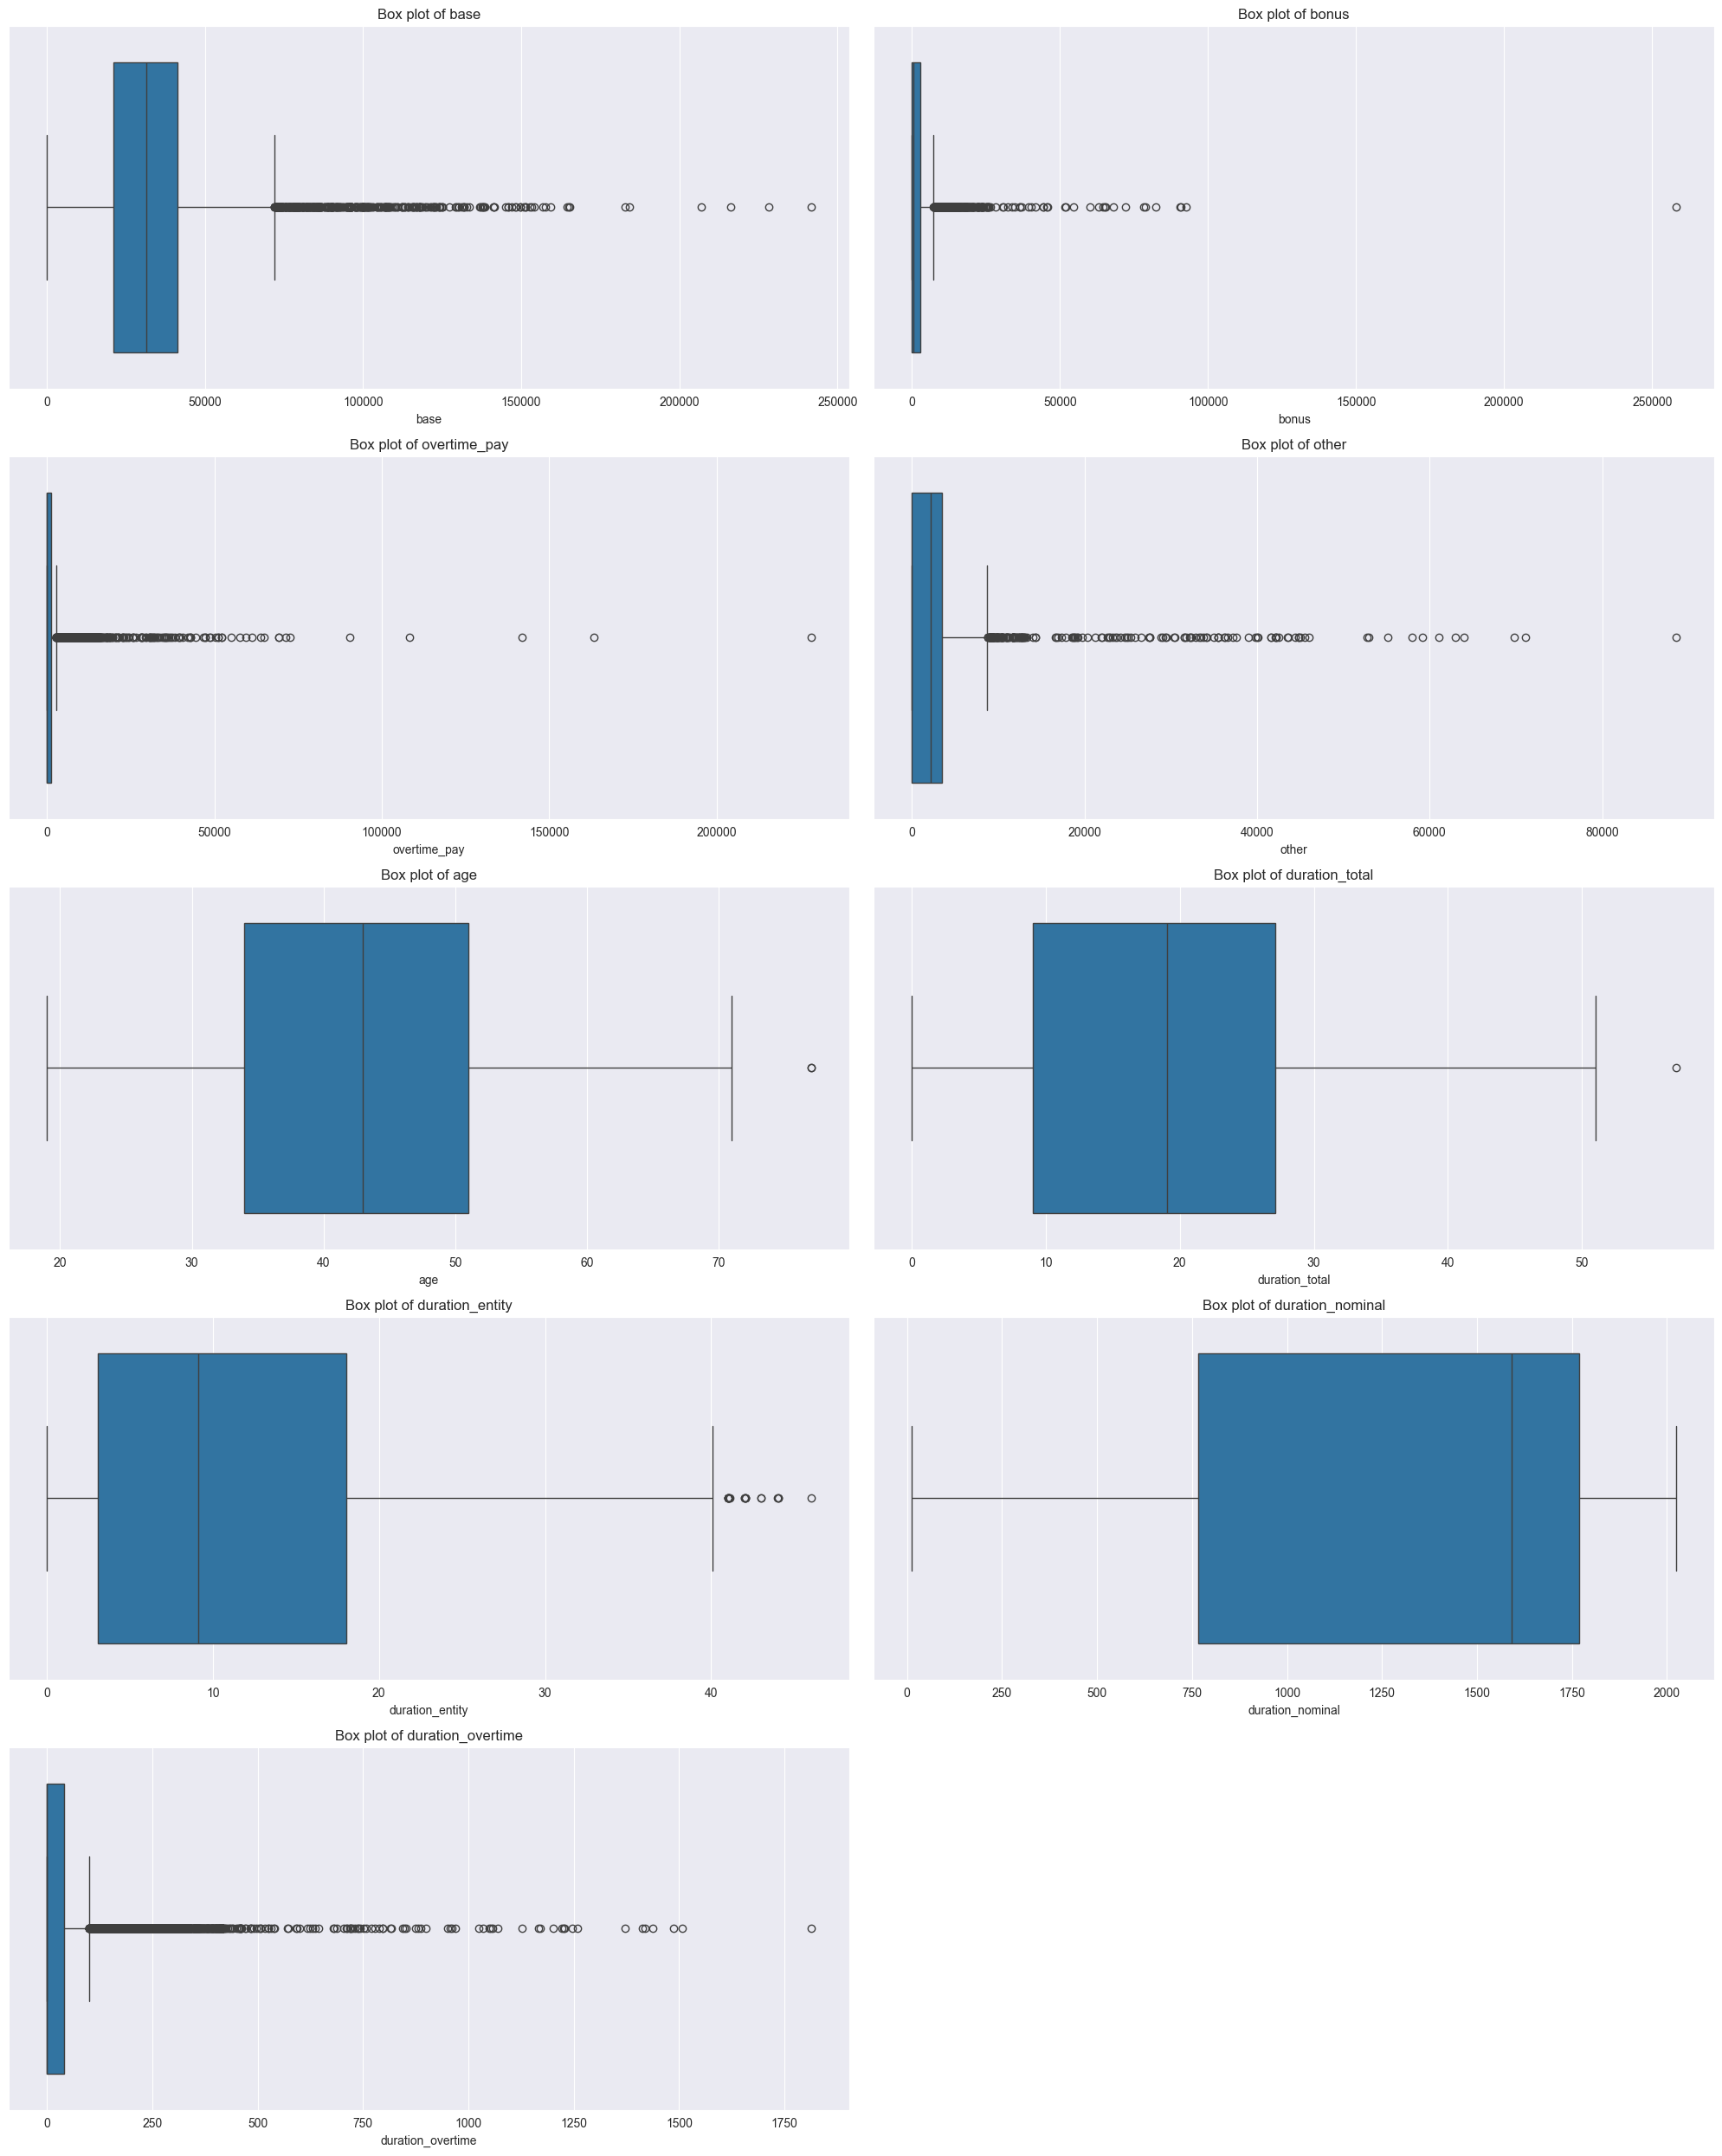

In [7]:
plt.figure(figsize=(20, 25))
for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Box plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


base: Best fitting distribution is lognorm (AIC=244985.83)


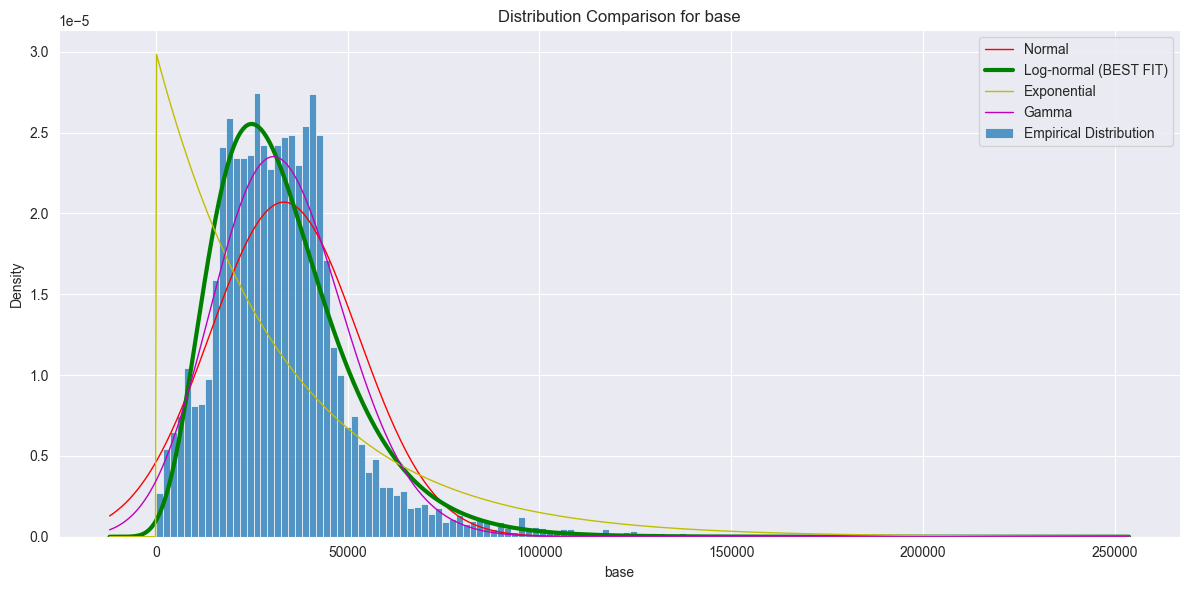

bonus: Best fitting distribution is expon (AIC=190593.66)


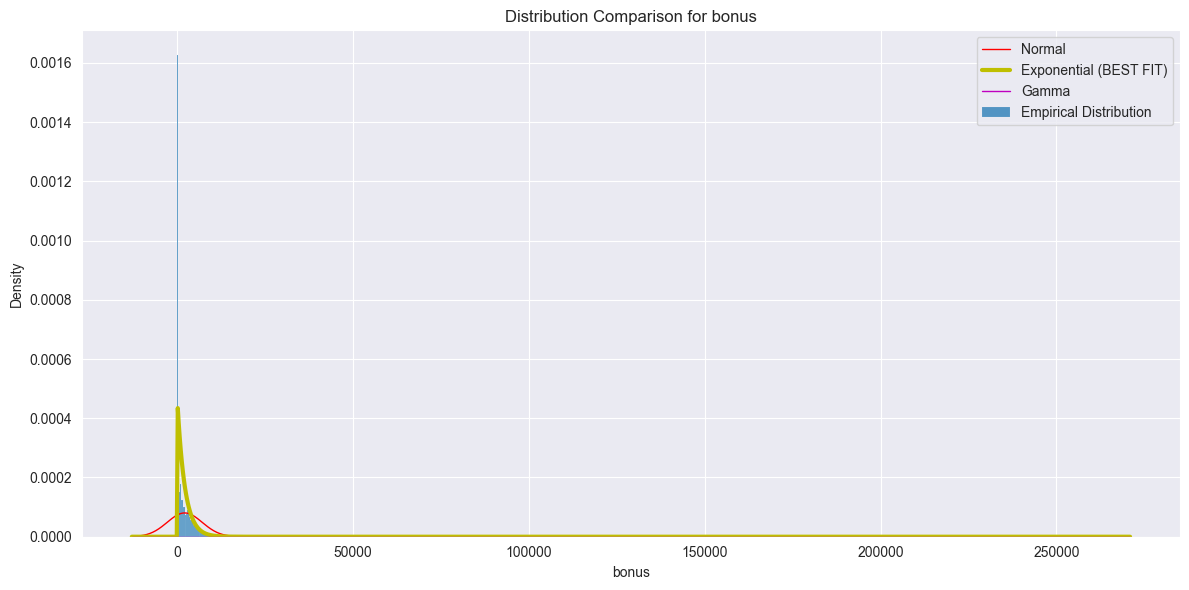

overtime_pay: Best fitting distribution is expon (AIC=185378.57)


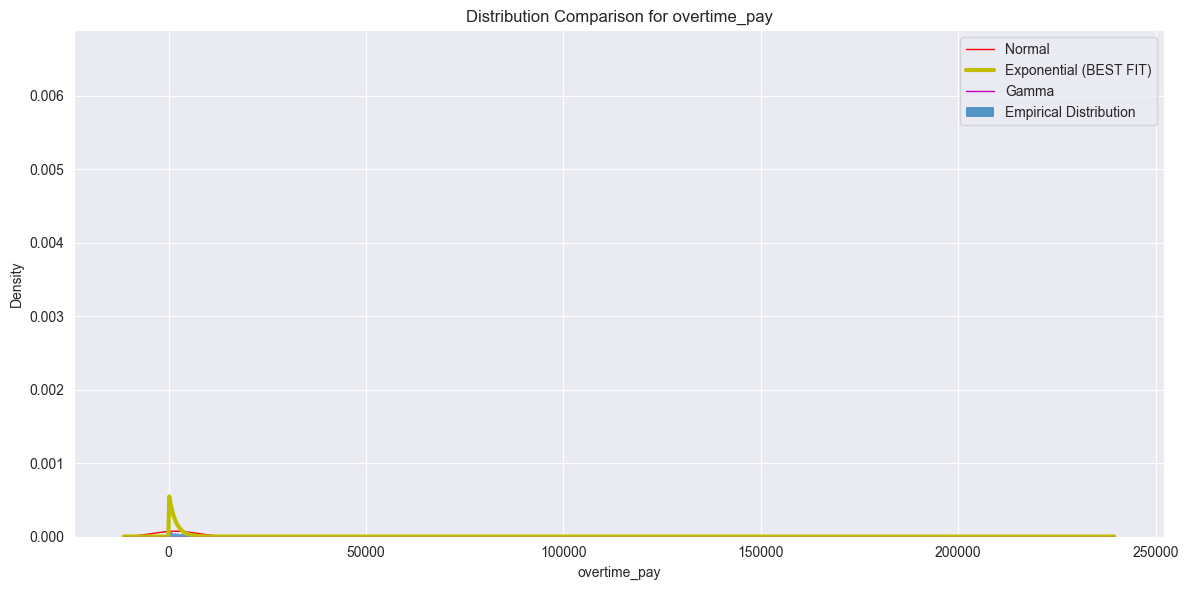

other: Best fitting distribution is expon (AIC=193935.23)


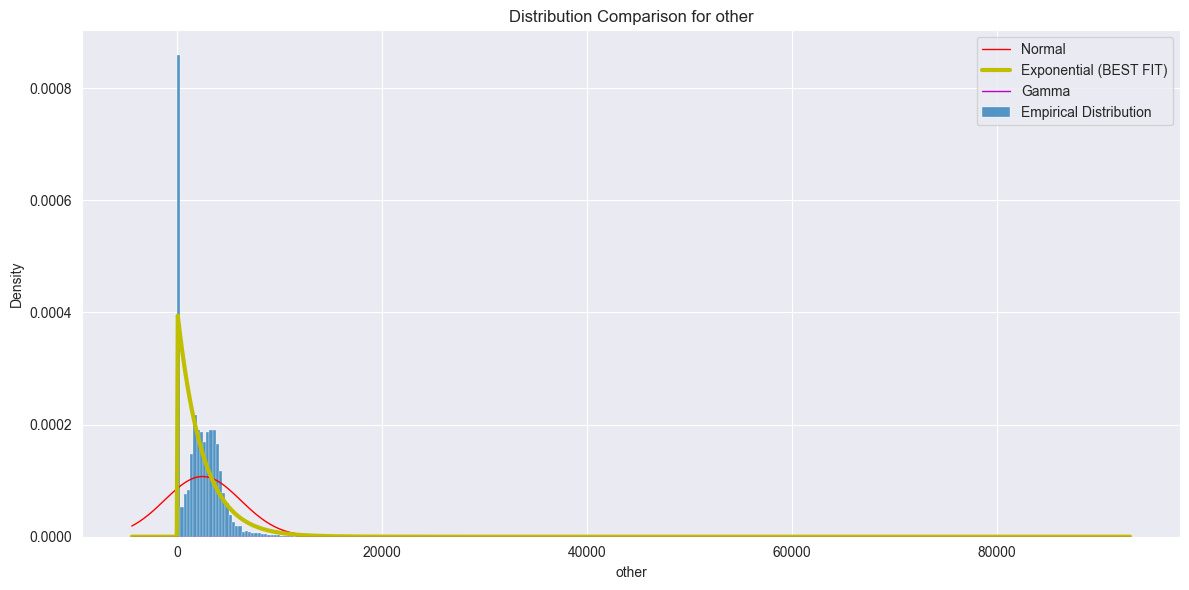

age: Best fitting distribution is norm (AIC=81903.21)


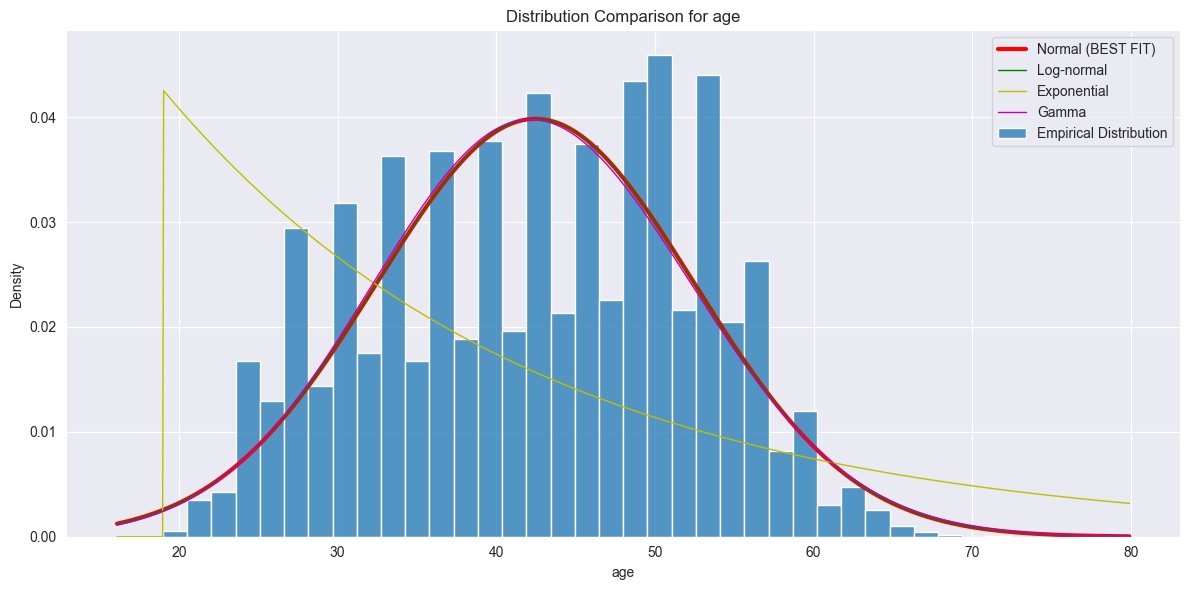

duration_total: Best fitting distribution is lognorm (AIC=83959.79)


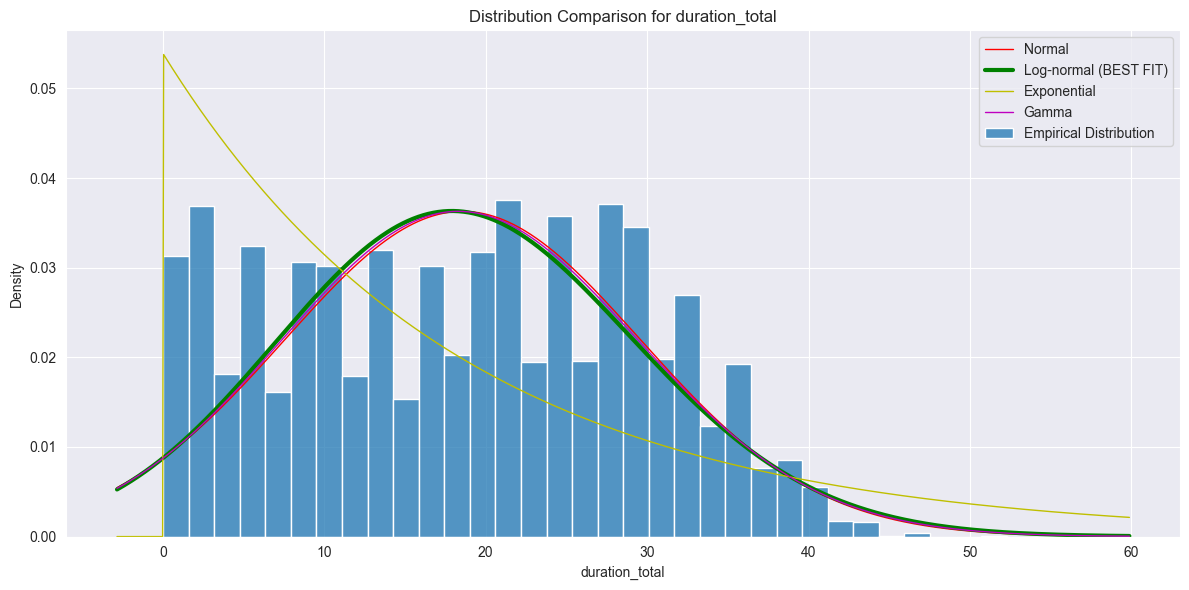

duration_entity: Best fitting distribution is gamma (AIC=74237.16)


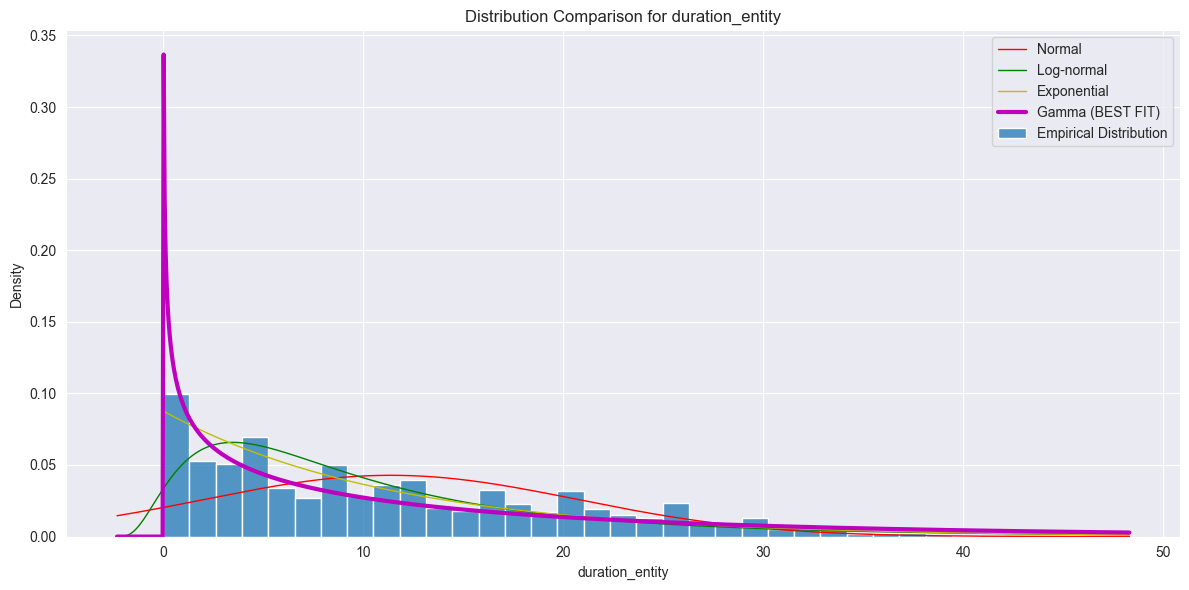

duration_nominal: Best fitting distribution is norm (AIC=169641.88)


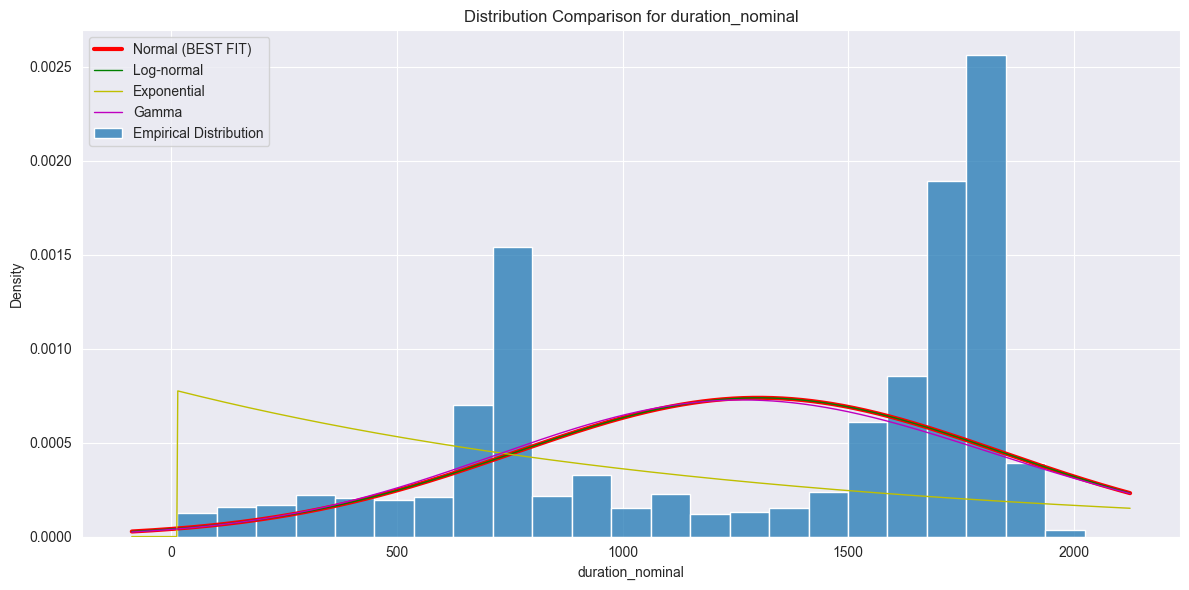

duration_overtime: Best fitting distribution is gamma (AIC=-414754.57)


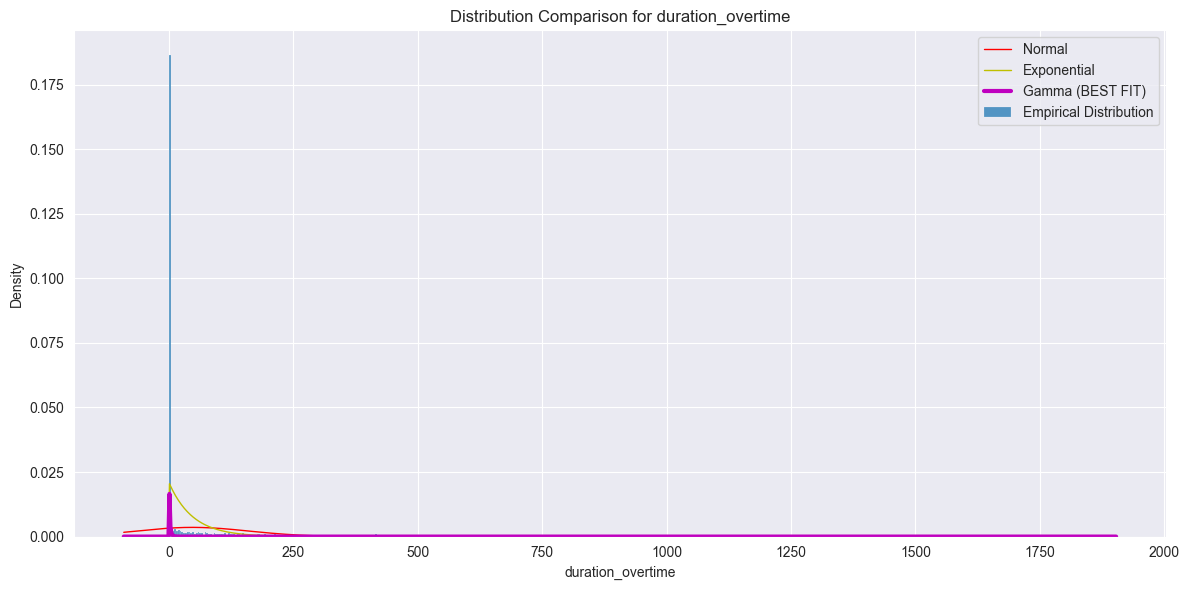

In [9]:
from scipy import stats
import numpy as np

def find_best_distribution(data, var_name):
    distributions = ['norm', 'lognorm', 'expon', 'gamma']
    best_distribution = None
    best_params = None
    best_aic = np.inf

    n = len(data)

    for distribution in distributions:
        if distribution == 'lognorm' and data.min() <= 0:
            continue

        try:
            if distribution == 'norm':
                params = stats.norm.fit(data)
                aic = 2 * 2 - 2 * np.sum(stats.norm.logpdf(data, *params))
            elif distribution == 'lognorm':
                params = stats.lognorm.fit(data)
                aic = 2 * 3 - 2 * np.sum(stats.lognorm.logpdf(data, *params))
            elif distribution == 'expon':
                params = stats.expon.fit(data)
                aic = 2 * 2 - 2 * np.sum(stats.expon.logpdf(data, *params))
            elif distribution == 'gamma':
                params = stats.gamma.fit(data)
                aic = 2 * 3 - 2 * np.sum(stats.gamma.logpdf(data, *params))
            if aic < best_aic:
                best_distribution = distribution
                best_params = params
                best_aic = aic

        except Exception as e:
            continue

    print(f"{var_name}: Best fitting distribution is {best_distribution} (AIC={best_aic:.2f})")
    return best_distribution, best_params

def plot_distribution_comparison(data, var_name, best_dist):
    plt.figure(figsize=(12, 6))

    ax = sns.histplot(data, kde=False, stat="density", label="Empirical Distribution")

    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max, 1000)

    dist_styles = {
        'norm': ('r-', 'Normal'),
        'lognorm': ('g-', 'Log-normal'),
        'expon': ('y-', 'Exponential'),
        'gamma': ('m-', 'Gamma')
    }

    if data.min() <= 0 and best_dist == 'lognorm':
        best_dist = 'norm'

    if True:
        mu, sigma = stats.norm.fit(data)
        pdf_norm = stats.norm.pdf(x, mu, sigma)
        if best_dist == 'norm':
            plt.plot(x, pdf_norm, dist_styles['norm'][0], linewidth=3, label=f'{dist_styles["norm"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_norm, dist_styles['norm'][0], linewidth=1, label=f'{dist_styles["norm"][1]}')

    if data.min() > 0:
        shape, loc, scale = stats.lognorm.fit(data)
        pdf_lognorm = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
        if best_dist == 'lognorm':
            plt.plot(x, pdf_lognorm, dist_styles['lognorm'][0], linewidth=3, label=f'{dist_styles["lognorm"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_lognorm, dist_styles['lognorm'][0], linewidth=1, label=f'{dist_styles["lognorm"][1]}')

    if data.min() >= 0:
        loc, scale = stats.expon.fit(data)
        pdf_expon = stats.expon.pdf(x, loc=loc, scale=scale)
        if best_dist == 'expon':
            plt.plot(x, pdf_expon, dist_styles['expon'][0], linewidth=3, label=f'{dist_styles["expon"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_expon, dist_styles['expon'][0], linewidth=1, label=f'{dist_styles["expon"][1]}')

        try:
            a, loc, scale = stats.gamma.fit(data)
            pdf_gamma = stats.gamma.pdf(x, a, loc=loc, scale=scale)
            if best_dist == 'gamma':
                plt.plot(x, pdf_gamma, dist_styles['gamma'][0], linewidth=3, label=f'{dist_styles["gamma"][1]} (BEST FIT)')
            else:
                plt.plot(x, pdf_gamma, dist_styles['gamma'][0], linewidth=1, label=f'{dist_styles["gamma"][1]}')
        except:
            pass

    plt.title(f'Distribution Comparison for {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

for var in quantitative_vars:
    best_dist, best_params = find_best_distribution(df[var], var)
    plot_distribution_comparison(df[var], var, best_dist)


For qualitative variables, it can be observed that most employees are woman, have higher education, work in the public sector and have an employment contract for an indefinite period.
For quantitative variables it can be observed that the base pay follows a logarithmic normal distribution, which is expected for a value describing a salary. Age follows a normal distribution, which can be expected if workers gradually enter and exit the workforce as they age. Distribution of workers in the middle of the working age bracket remains fairly constant.
For some quantitative variables, mainly bonus and overtime pay, the number of workers not receiving anything is so high that fitting a standard density function is challenging. This is expected for the public sector, where overtime pay and bonuses are generally rare.

# Task 2: Clustering


For clustering a standard K-means method was used due to relatively low time complexity and ease of implementation. For qualitative columns one-hot numerical representation is used as it is appropriate for this type of variable. Standard techniques for quantitative data cannot be used as the number corresponding to different characteristics is arbitrary and does not convey any relation between these characteristics. First binary column is dropped to prevent multicollinearity. Qualitative data is scaled using a sklearn StandardScaler that removes the mean and scales to unit variance. It was chosen due to its ease of use and versatility.

For 2 clusters the silhouette score is 0.206
For 3 clusters the silhouette score is 0.222
For 4 clusters the silhouette score is 0.190
For 5 clusters the silhouette score is 0.213
For 6 clusters the silhouette score is 0.207
For 7 clusters the silhouette score is 0.214
For 8 clusters the silhouette score is 0.200
For 9 clusters the silhouette score is 0.205
For 10 clusters the silhouette score is 0.194


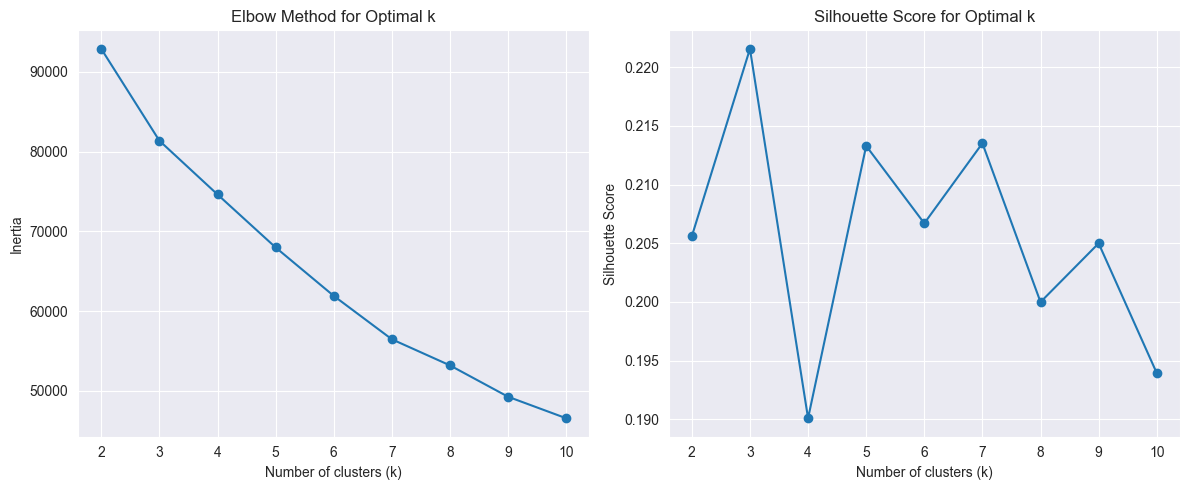

For 2 clusters the silhouette score is 0.206


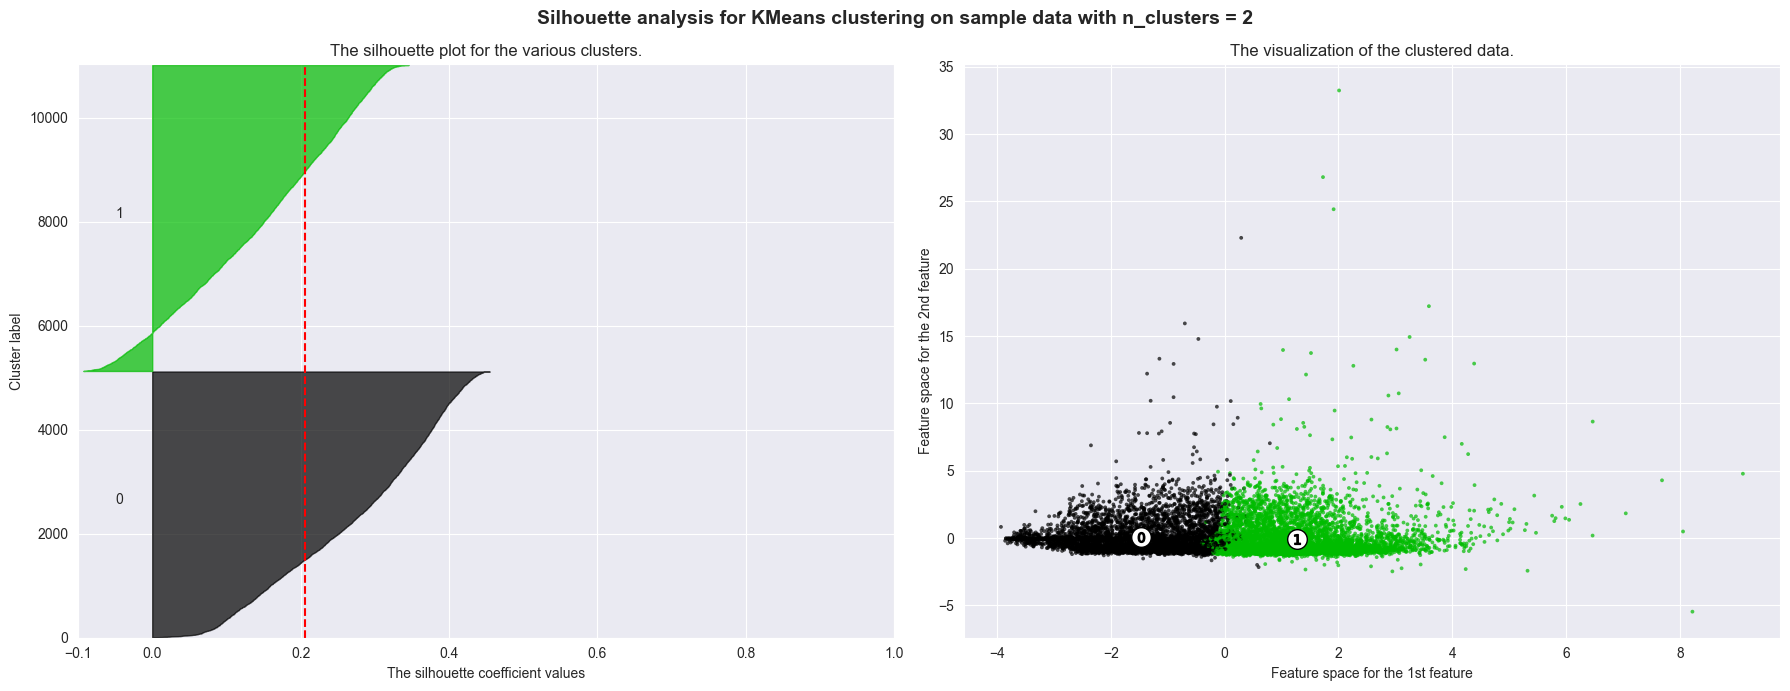

For 3 clusters the silhouette score is 0.222


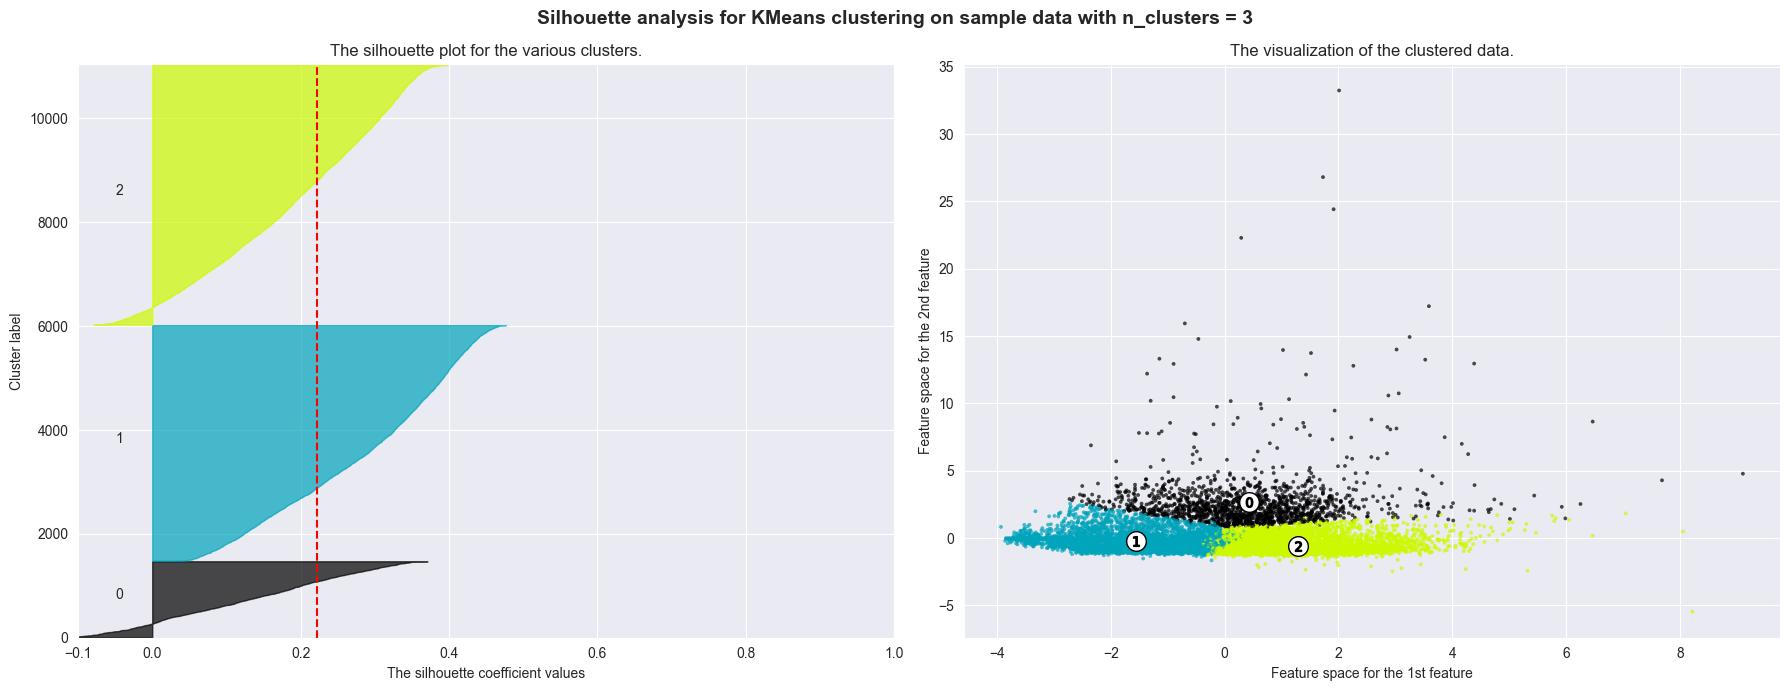

For 4 clusters the silhouette score is 0.190


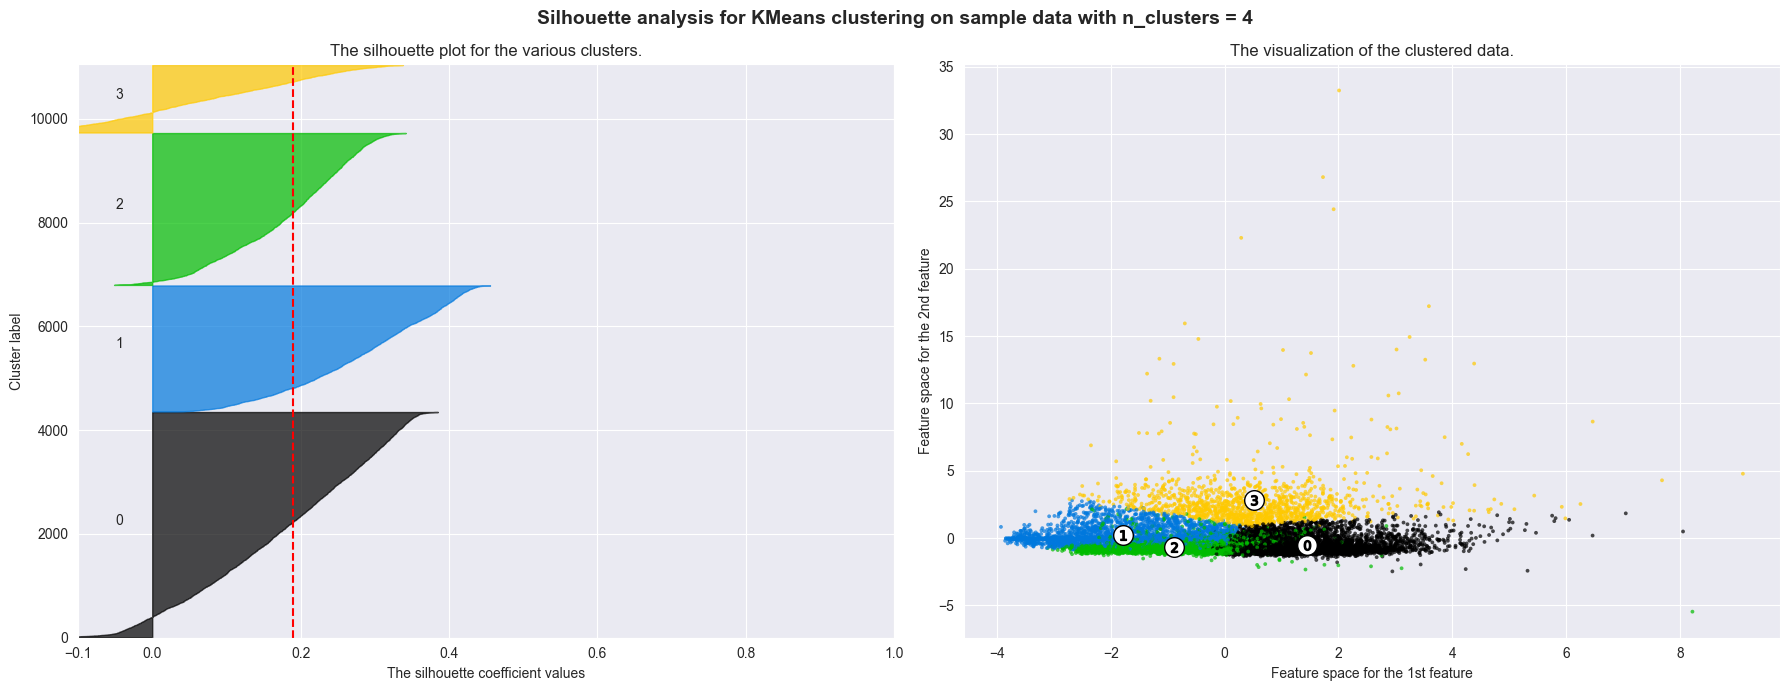

For 5 clusters the silhouette score is 0.213


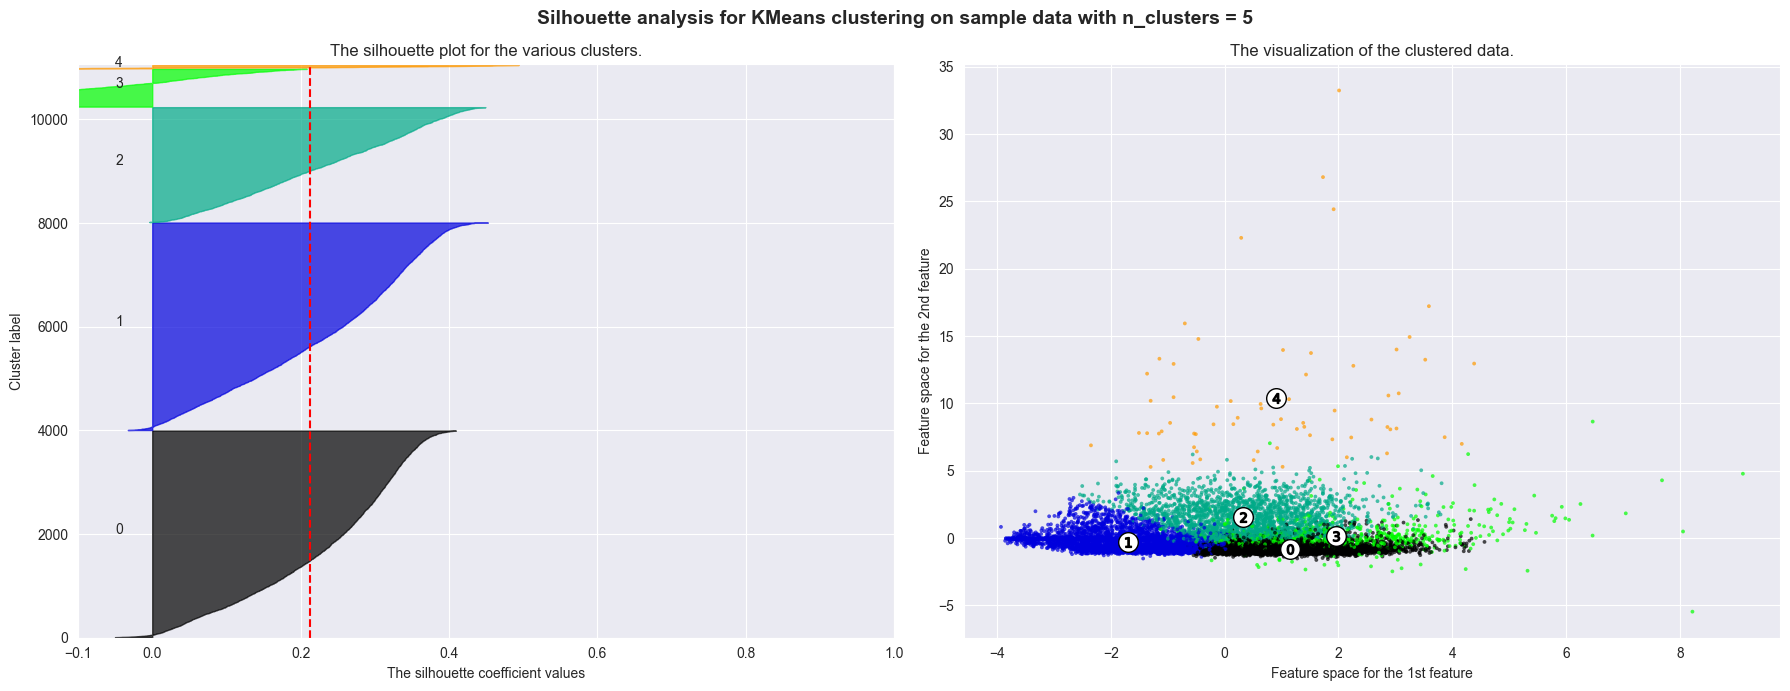

For 6 clusters the silhouette score is 0.207


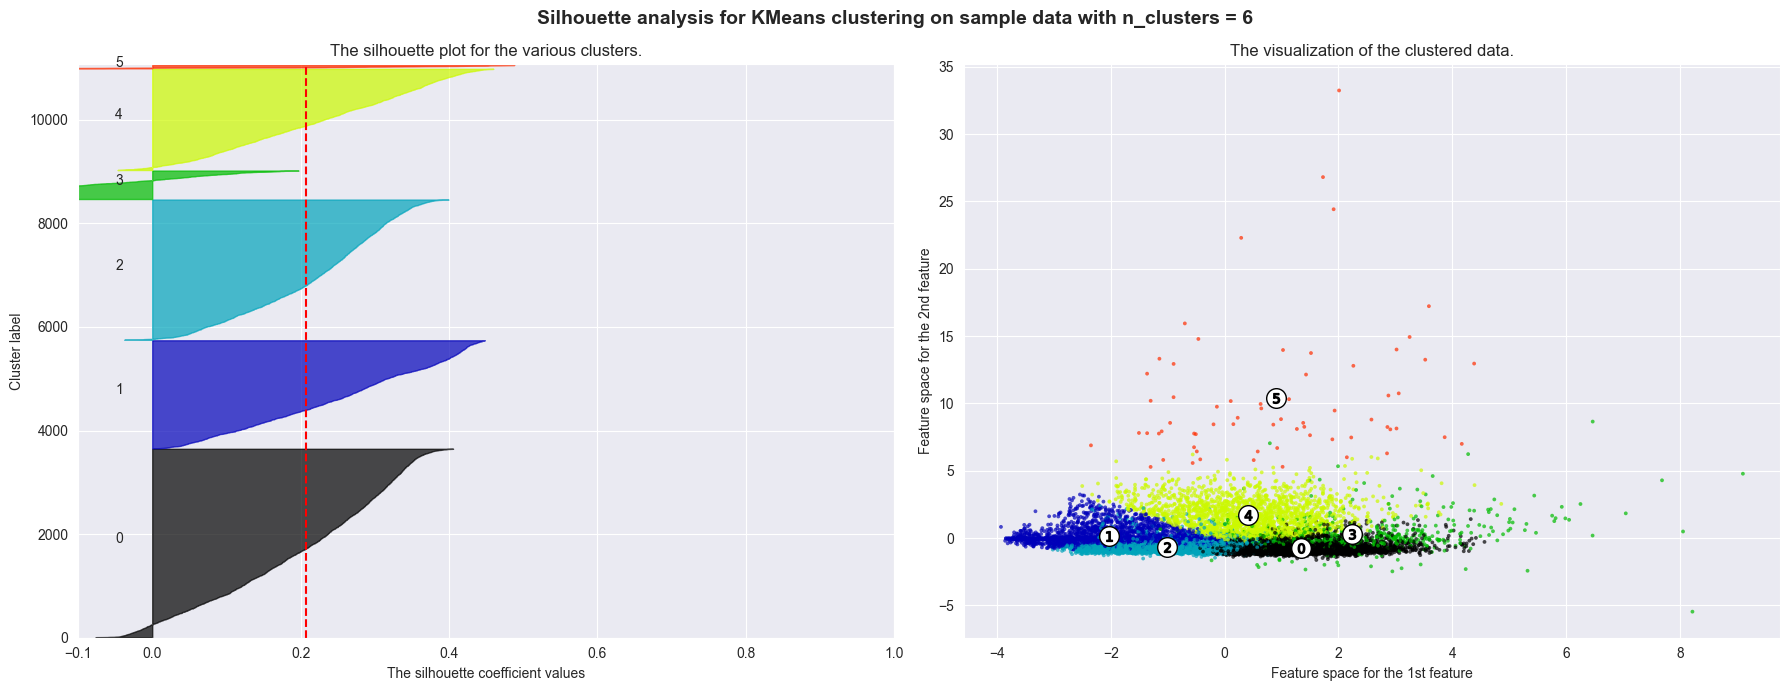

For 7 clusters the silhouette score is 0.214


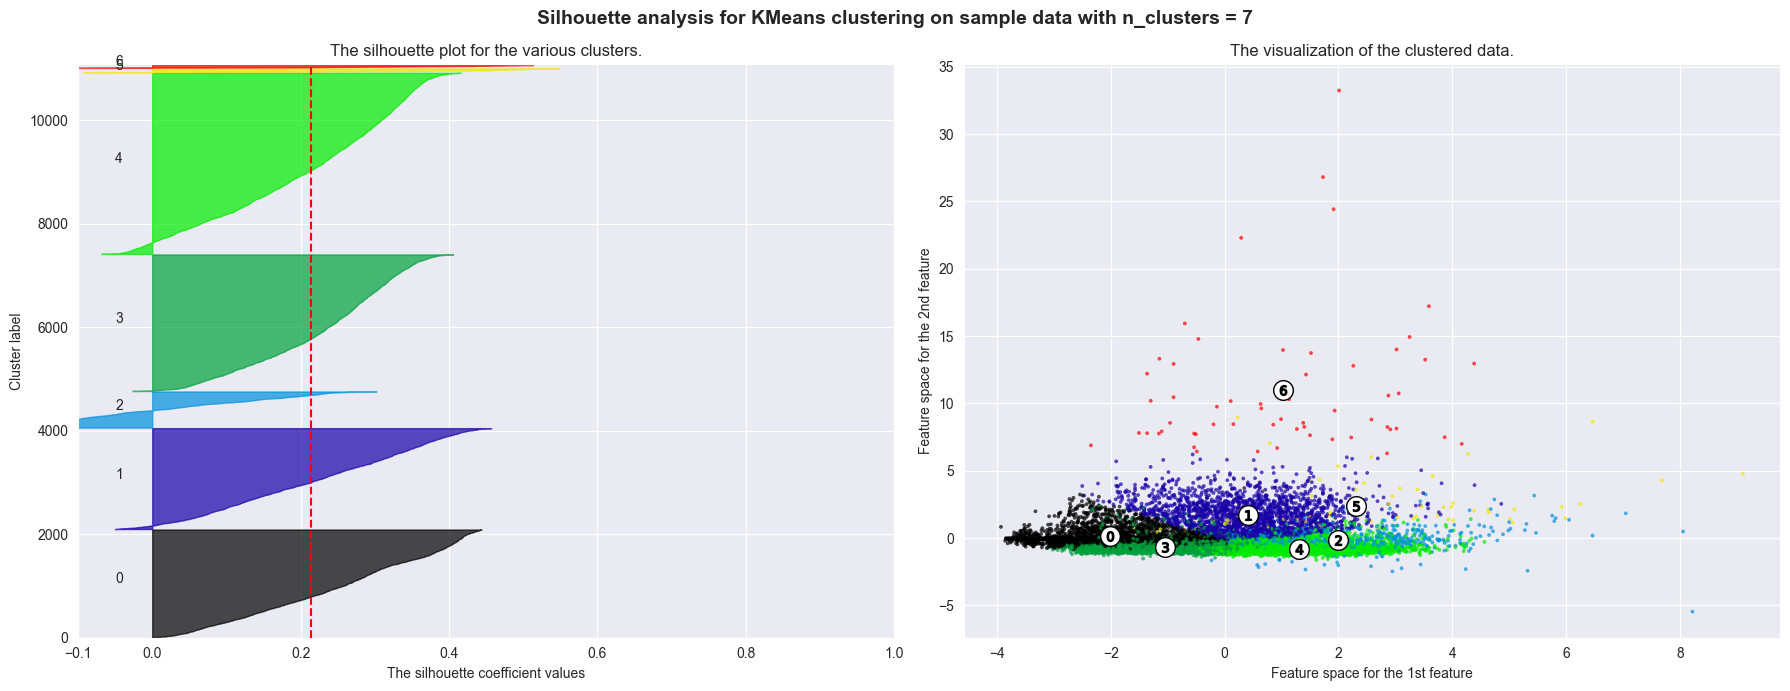

For 8 clusters the silhouette score is 0.200


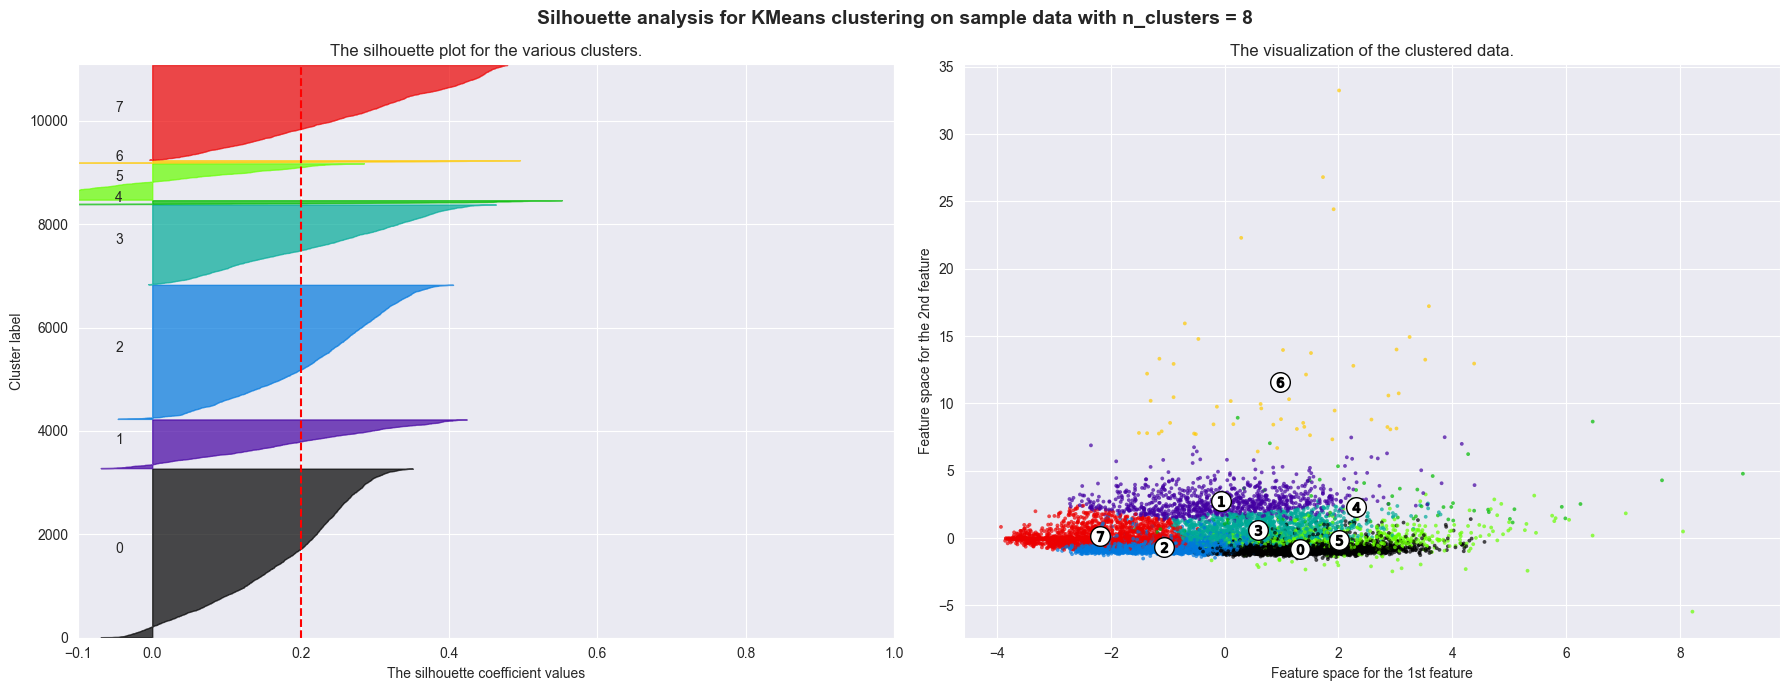

For 9 clusters the silhouette score is 0.205


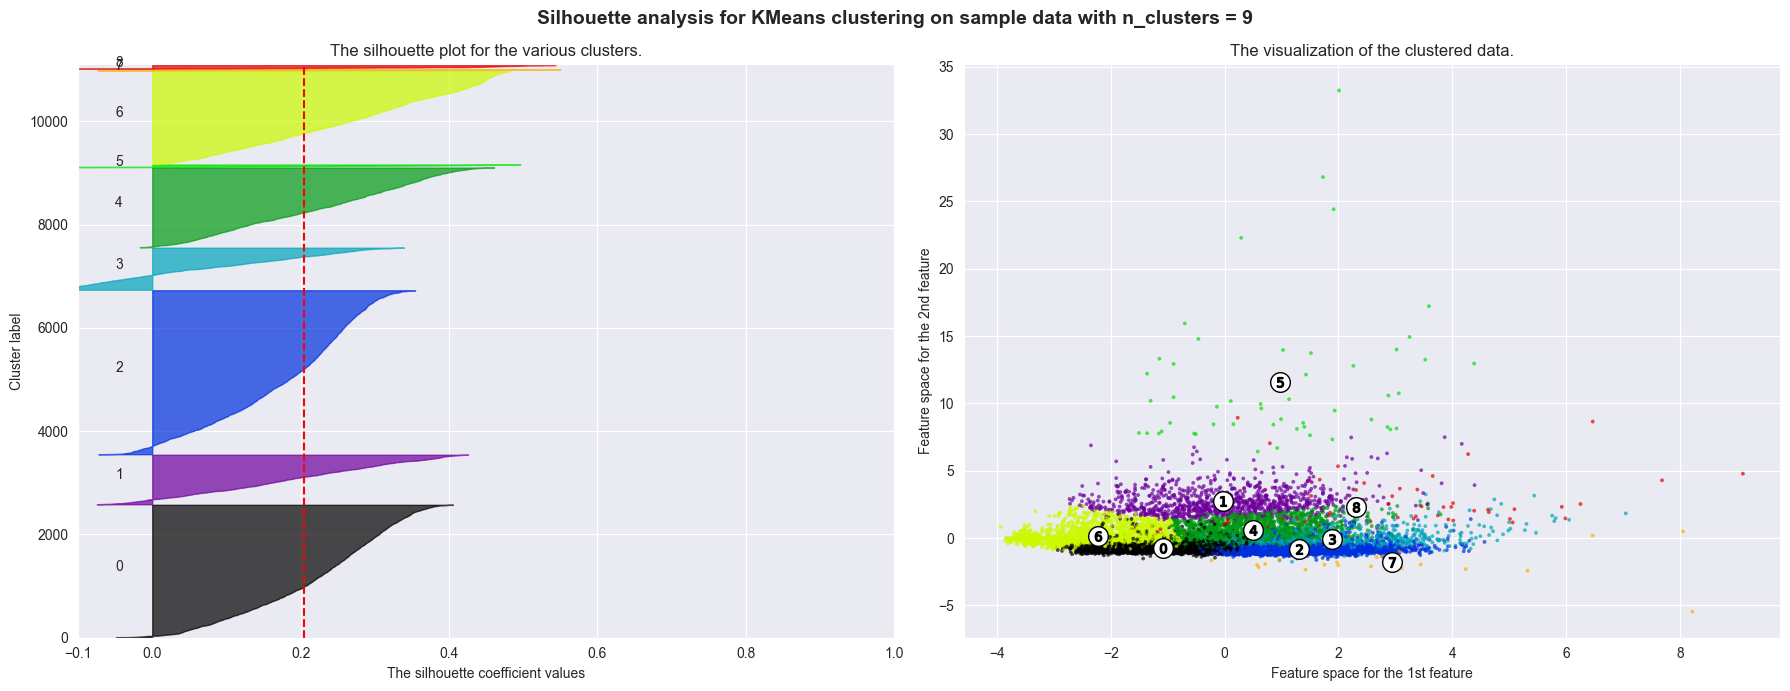

For 10 clusters the silhouette score is 0.194


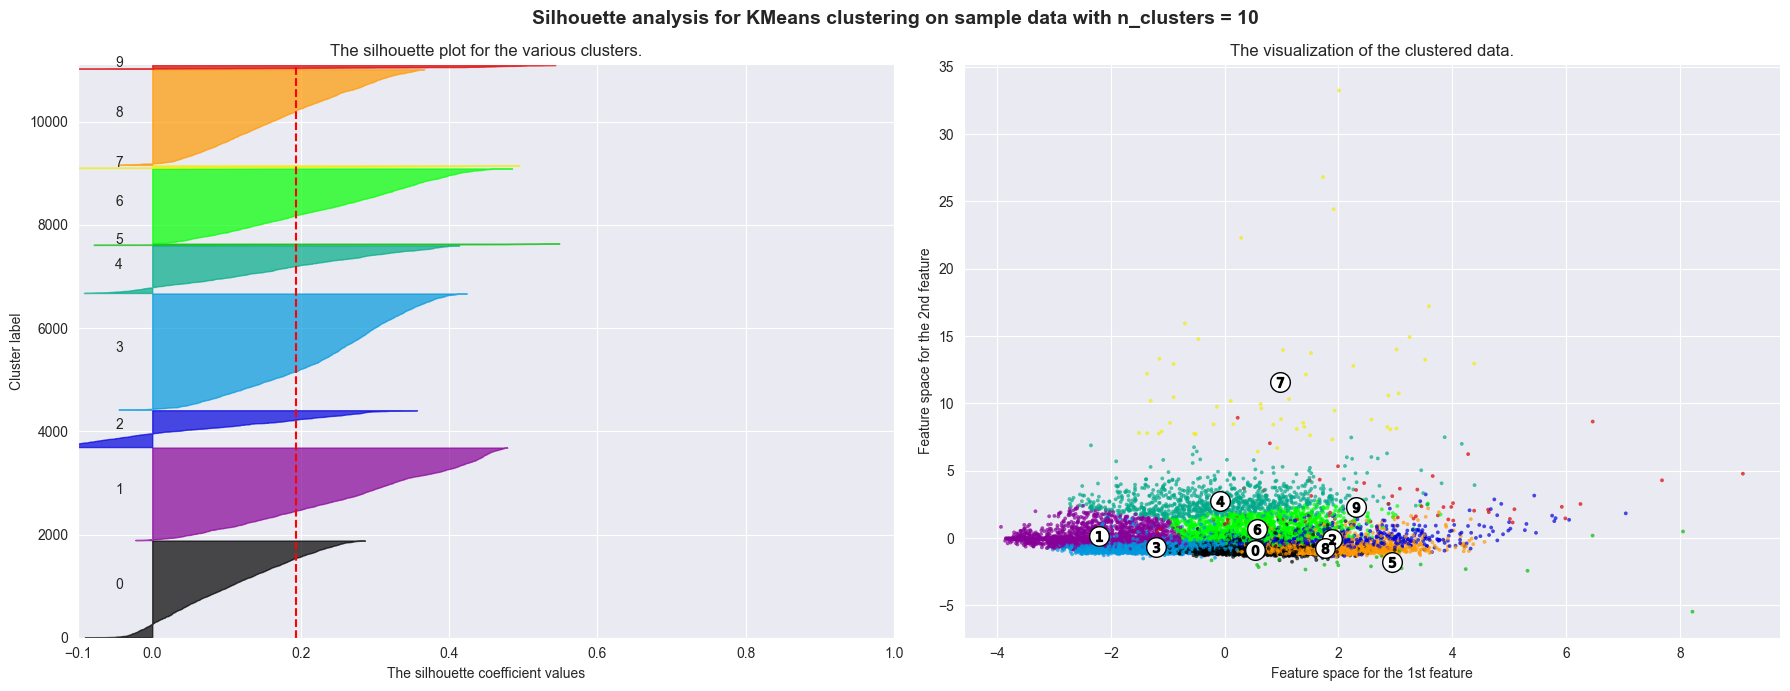

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm

quantitative_features = ['base', 'bonus', 'overtime_pay', 'other', 'age',
                      'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
qualitative_features = ['sector', 'section_07', 'sex', 'education', 'contract']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features),
        ('cat', OneHotEncoder(drop='first'), qualitative_features)
    ])

X_processed = preprocessor.fit_transform(df[quantitative_features + qualitative_features])

def find_optimal_clusters(data, max_k):
    inertias = []
    silhouette_scores = []
    k_values = range(2, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For {k} clusters the silhouette score is {silhouette_avg:.3f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertias, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plot_silhouette_analysis(data, k_values)

    return inertias, silhouette_scores

def plot_silhouette_analysis(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For {n_clusters} clusters the silhouette score is {silhouette_avg:.3f}")

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        if X.shape[1] > 2:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X)
            X_plot = X_pca
        else:
            X_plot = X

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_plot[:, 0], X_plot[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        centers = clusterer.cluster_centers_

        if X.shape[1] > 2:
            centers_pca = pca.transform(centers)
            centers_plot = centers_pca
        else:
            centers_plot = centers

        ax2.scatter(
            centers_plot[:, 0],
            centers_plot[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_plot):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        plt.tight_layout()
        plt.show()

inertias, silhouette_scores = find_optimal_clusters(X_processed, 10)


In [15]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_processed)
df['cluster'] = cluster_labels
cluster_means = df.groupby('cluster')[quantitative_features].mean()

for i in range(optimal_k):
    print(f"\nCluster {i}:")

    cluster_profile = cluster_means.loc[i] - cluster_means.mean()
    top_features = cluster_profile.abs().sort_values(ascending=False).head(3).index

    for feature in top_features:
        if cluster_profile[feature] > 0:
            print(f"- Higher {feature}: {cluster_means.loc[i, feature]:.2f} vs overall mean {cluster_means[feature].mean():.2f}")
        else:
            print(f"- Lower {feature}: {cluster_means.loc[i, feature]:.2f} vs overall mean {cluster_means[feature].mean():.2f}")



Cluster 0:
- Higher base: 42315.78 vs overall mean 35243.45
- Higher overtime_pay: 9618.30 vs overall mean 3518.24
- Higher other: 5496.18 vs overall mean 3165.55

Cluster 1:
- Lower base: 25565.31 vs overall mean 35243.45
- Lower overtime_pay: 608.51 vs overall mean 3518.24
- Lower other: 1705.05 vs overall mean 3165.55

Cluster 2:
- Lower overtime_pay: 327.93 vs overall mean 3518.24
- Higher base: 37849.26 vs overall mean 35243.45
- Higher bonus: 2942.65 vs overall mean 1872.02


# Task 3: Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.pipeline import Pipeline

df['higher_education'] = (df['education'] <= 2).astype(int)

print("Target variable distribution:")
print(df['higher_education'].value_counts())
print(f"Percentage with higher education: {df['higher_education'].mean() * 100:.2f}%")

X = df.drop(['higher_education'], axis=1)
y = df['higher_education']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

quantitative_features_for_prediction = quantitative_features.copy()
qualitative_features_for_prediction = [f for f in qualitative_features if f != 'education']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features_for_prediction),
        ('cat', OneHotEncoder(drop='first'), qualitative_features_for_prediction)
    ])

models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ])
}

results = {}
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train[quantitative_features_for_prediction + qualitative_features_for_prediction], y_train)

    y_pred = model.predict(X_test[quantitative_features_for_prediction + qualitative_features_for_prediction])
    y_pred_proba = model.predict_proba(X_test[quantitative_features_for_prediction + qualitative_features_for_prediction])[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy}

    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {accuracy:.3f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


performance_df = pd.DataFrame(results).T
performance_df = performance_df.sort_values('accuracy', ascending=False)
print("\nModel Performance Comparison (Train-Test Split):")
print(performance_df)


In [ ]:
print("\n--- Cross-Validation Results ---")
cv_results = {}
n_folds = 5

scoring = {
    'accuracy': 'accuracy'
}

cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nPerforming {n_folds}-fold cross-validation for {name}...")

    cv_scores = cross_validate(
        model, 
        X[quantitative_features_for_prediction + qualitative_features_for_prediction], 
        y, 
        cv=cv, 
        scoring=scoring,
        return_train_score=True
    )

    cv_accuracy = cv_scores['test_accuracy'].mean()
    cv_accuracy_std = cv_scores['test_accuracy'].std()

    cv_results[name] = {
        'accuracy': cv_accuracy,
        'accuracy_std': cv_accuracy_std
    }

    print(f"CV Accuracy: {cv_accuracy:.3f} ± {cv_accuracy_std:.3f}")
cv_performance_df = pd.DataFrame({
    model_name: {
        'CV Accuracy': f"{scores['accuracy']:.3f} ± {scores['accuracy_std']:.3f}",
        'Train-Test Accuracy': f"{performance_df.loc[model_name, 'accuracy']:.3f}"
    }
    for model_name, scores in cv_results.items()
}).T

cv_performance_df = cv_performance_df.sort_values('CV Accuracy', ascending=False)
print("\nModel Performance Comparison (Cross-Validation vs. Train-Test Split):")
print(cv_performance_df)


if 'Logistic Regression' in models:
    feature_names = (
        quantitative_features_for_prediction + 
        list(models['Logistic Regression'].named_steps['preprocessor']
             .named_transformers_['cat']
             .get_feature_names_out(qualitative_features_for_prediction))
    )

    coefficients = models['Logistic Regression'].named_steps['classifier'].coef_[0]

    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
    plt.title('Top 10 Features by Importance (Logistic Regression)')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.tight_layout()
    plt.show()


# Task 4: Regression

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import matplotlib.cm as cm

target = 'base'
features = [col for col in df.columns if col not in [target, 'id', 'cluster', 'higher_education']]

quantitative_features_reg = [f for f in quantitative_features if f != target]
qualitative_features_reg = qualitative_features

print(f"Target variable: {target}")
print(f"Quantitative features: {quantitative_features_reg}")
print(f"Qualitative features: {qualitative_features_reg}")

print("\n--- Feature Selection ---")
corr_with_target = df[quantitative_features_reg + [target]].corr()[target].abs().sort_values(ascending=False)
print("Correlation of quantitative features with target:")
print(corr_with_target)

correlation_threshold = 0.1
selected_quant_features = corr_with_target[corr_with_target > correlation_threshold].index.tolist()
selected_quant_features.remove(target)
print(f"\nSelected quantitative features (correlation > {correlation_threshold}):")
print(selected_quant_features)

selected_features = selected_quant_features + qualitative_features_reg
print(f"\nTotal selected features: {len(selected_features)}")

y_binned = pd.qcut(df[target], q=5, labels=False)
X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test, y_binned_train, y_binned_test = train_test_split(
    X, y, y_binned, test_size=0.3, random_state=42, stratify=y_binned
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("\nTarget distribution in training and testing sets:")
print(f"Training mean: {y_train.mean():.2f}, median: {y_train.median():.2f}")
print(f"Testing mean: {y_test.mean():.2f}, median: {y_test.median():.2f}")

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_quant_features),
        ('cat', OneHotEncoder(drop='first'), qualitative_features_reg)
    ])

from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import Lasso, Ridge, ElasticNet
models = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42, n_estimators=50))),
        ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
    ]),
    'Lasso Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.1, random_state=42))
    ]),
    'Ridge Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1.0, random_state=42))
    ]),
    'ElasticNet': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
    ])
}


Target variable: base
Quantitative features: ['bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
Qualitative features: ['sector', 'section_07', 'sex', 'education', 'contract']

Training set size: 7700 samples
Testing set size: 3300 samples



--- Training Random Forest Regression Model ---
Training MSE: 10690668.78
Testing MSE: 65435725.10
Training RMSE: 3269.66
Testing RMSE: 8089.24
Training R²: 0.9716
Testing R²: 0.8182
Training MAE: 1387.64
Testing MAE: 3472.98


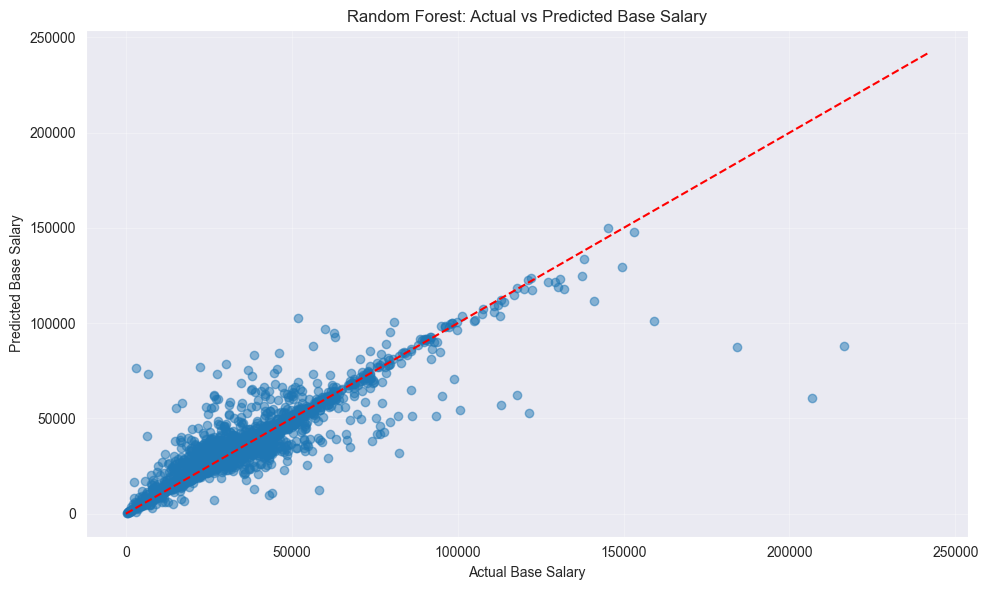

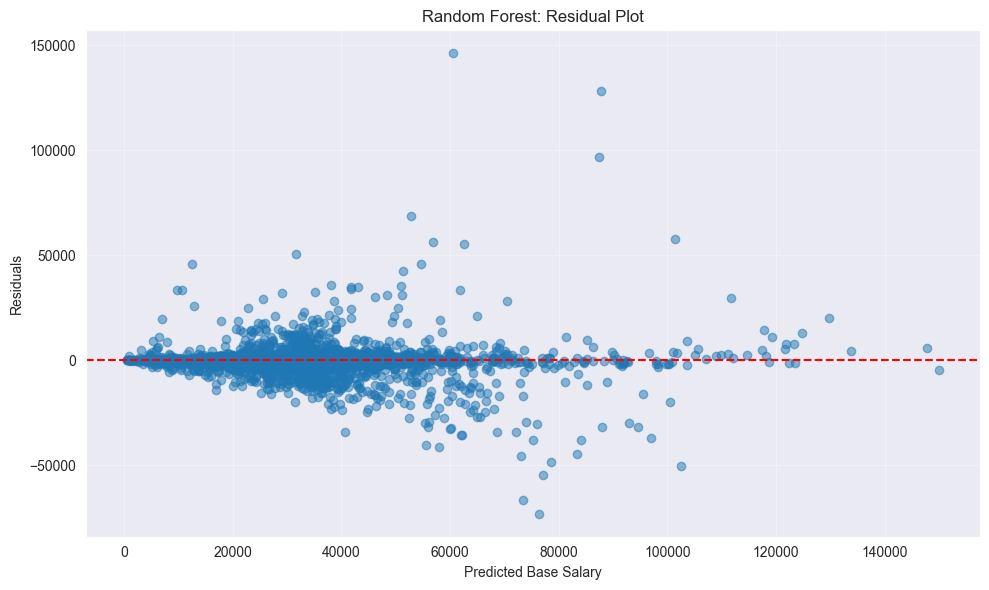

In [24]:
print("\n--- Training and Evaluating Regression Models ---")

results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'y_pred_test': y_pred_test
    }

    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.2f}")
    print(f"Testing MAE: {test_mae:.2f}")
    if name == 'Lasso Regression' or name == 'ElasticNet':
        feature_names = (
            selected_quant_features + 
            list(model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(qualitative_features_reg))
        )

        coefficients = model.named_steps['regressor'].coef_

        selected_features_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coefficients
        })

        selected_features_df = selected_features_df[selected_features_df['Coefficient'] != 0]

        print(f"\nNumber of features selected by {name}: {len(selected_features_df)} out of {len(feature_names)}")

        selected_features_df['Abs_Coefficient'] = selected_features_df['Coefficient'].abs()
        top_features = selected_features_df.sort_values('Abs_Coefficient', ascending=False).head(10)
        print(f"\nTop 10 features selected by {name}:")
        print(top_features[['Feature', 'Coefficient']])

performance_df = pd.DataFrame({
    model_name: {
        'Test RMSE': f"{results[model_name]['test_rmse']:.2f}",
        'Test R²': f"{results[model_name]['test_r2']:.4f}",
        'Test MAE': f"{results[model_name]['test_mae']:.2f}",
        'Train-Test R² Diff': f"{results[model_name]['train_r2'] - results[model_name]['test_r2']:.4f}"
    }
    for model_name in results.keys()
}).T

performance_df = performance_df.sort_values('Test R²', ascending=False)
print("\nModel Performance Comparison:")
print(performance_df)

best_model_name = performance_df.index[0]
print(f"\nBest model: {best_model_name}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, results[best_model_name]['y_pred_test'], alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Base Salary')
plt.ylabel('Predicted Base Salary')
plt.title(f'{best_model_name}: Actual vs Predicted Base Salary')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
residuals = y_test - results[best_model_name]['y_pred_test']
plt.figure(figsize=(10, 6))
plt.scatter(results[best_model_name]['y_pred_test'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Base Salary')
plt.ylabel('Residuals')
plt.title(f'{best_model_name}: Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print(f"\n--- Feature Importance Analysis for {best_model_name} ---")

if best_model_name == 'Random Forest':
    feature_names = (
        selected_quant_features + 
        list(models[best_model_name].named_steps['preprocessor']
             .named_transformers_['cat']
             .get_feature_names_out(qualitative_features_reg))
    )

    importances = models[best_model_name].named_steps['regressor'].feature_importances_

    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Top 15 Features by Importance ({best_model_name})')
    plt.tight_layout()
    plt.show()

    selected_features_mask = models[best_model_name].named_steps['feature_selection'].get_support()
    num_selected = sum(selected_features_mask)
    print(f"Number of features selected by Random Forest feature selection: {num_selected} out of {len(feature_names)}")

    selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features_mask[i]]
    print("Selected features:")
    print(selected_feature_names)

elif best_model_name in ['Lasso Regression', 'ElasticNet']:
    pass

elif best_model_name == 'Ridge Regression':
    feature_names = (
        selected_quant_features + 
        list(models[best_model_name].named_steps['preprocessor']
             .named_transformers_['cat']
             .get_feature_names_out(qualitative_features_reg))
    )

    coefficients = models[best_model_name].named_steps['regressor'].coef_

    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title(f'Top 15 Features by Coefficient Magnitude ({best_model_name})')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.tight_layout()
    plt.show()


In [ ]:
print("\n--- Cross-Validation Results ---")
n_folds = 5

scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2'
}

cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

print(f"\nPerforming {n_folds}-fold cross-validation for {best_model_name}...")

cv_scores = cross_validate(
    models[best_model_name], 
    X, 
    y, 
    cv=cv, 
    scoring=scoring,
    return_train_score=True
)

cv_mse = -cv_scores['test_neg_mean_squared_error'].mean()
cv_mse_std = cv_scores['test_neg_mean_squared_error'].std()
cv_rmse = np.sqrt(cv_mse)
cv_rmse_std = cv_mse_std / (2 * cv_rmse)
cv_r2 = cv_scores['test_r2'].mean()
cv_r2_std = cv_scores['test_r2'].std()
print(f"CV MSE: {cv_mse:.2f} ± {cv_mse_std:.2f}")
print(f"CV RMSE: {cv_rmse:.2f} ± {cv_rmse_std:.2f}")
print(f"CV R²: {cv_r2:.4f} ± {cv_r2_std:.4f}")

print("\nModel Performance (Cross-Validation vs. Train-Test Split):")
print(f"CV RMSE: {cv_rmse:.2f} ± {cv_rmse_std:.2f} | Test RMSE: {results[best_model_name]['test_rmse']:.2f}")
print(f"CV R²: {cv_r2:.4f} ± {cv_r2_std:.4f} | Test R²: {results[best_model_name]['test_r2']:.4f}")
